In [1]:
# imports

import os
import re
import math
import json
from tqdm import tqdm
import logging
import random
from dotenv import load_dotenv
from huggingface_hub import login
import matplotlib.pyplot as plt
import numpy as np
import pickle
from openai import OpenAI
from sentence_transformers import SentenceTransformer
from datasets import load_dataset
import chromadb
import modal

### Internal Classes
from testing import Tester
from agents.agents import Agent
from agents.specialist_agent import SpecialistAgent
from agents.frontier_agent import FrontierAgent
from agents.ensemble_agent import EnsembleAgent

/Volumes/VTG/Dev/C_5/Projects/week8/.venv/lib/python3.13/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# environment

load_dotenv(override=True)
os.environ['OPENAI_API_KEY'] = os.getenv('OPENAI_API_KEY')
os.environ['HF_TOKEN'] = os.getenv('HF_TOKEN')

In [3]:
# Log in to HuggingFace

hf_token = os.environ['HF_TOKEN']
login(hf_token, add_to_git_credential=True)

Note: Environment variable`HF_TOKEN` is set and is the current active token independently from the token you've just configured.


In [4]:
with open("test.pkl", "rb") as f: 
    test = pickle.load(f)

In [5]:
DB = "products_vectorstore/"

client = chromadb.PersistentClient(path=DB)
collection = client.get_or_create_collection("product")

In [6]:
def description(item):
    text = item.prompt.replace("How much does this cost to the nearest dollar?\n\n", "")
    return text.split("\n\nPrice is $")[0]

In [7]:
logging.basicConfig(level=logging.INFO)

In [8]:
ensemble_agent = EnsembleAgent(collection)

INFO:root:[Ensemble Agent] Initializing Ensemble Agent
INFO:root:[Specialist Agent] Specialist Agent is initializing -- connecting to Modal
INFO:root:[Specialist Agent] Specialist Agent is ready
INFO:root:[Frontier Agent] Initializing Frontier Agent
INFO:root:[Frontier Agent] Frontier Agent is setting up with OpenAI
INFO:sentence_transformers.SentenceTransformer:Use pytorch device_name: mps
INFO:sentence_transformers.SentenceTransformer:Load pretrained SentenceTransformer: sentence-transformers/all-MiniLM-L6-v2
INFO:root:[Frontier Agent] Frontier Agent is ready
INFO:root:[Ensemble Agent] Ensemble Agent is ready


INFO:root:[Ensemble Agent] Running Ensemble Agent - collaborating with specialist, frontier and random forest agents
INFO:root:[Specialist Agent] Specialist Agent is calling remote fine-tuned model
INFO:root:[Specialist Agent] Specialist Agent completed - predicting $220.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|███████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  1.78it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $159.99
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $165.99
INFO:root:[Ensemble Agent] Running Ensemble Agent - collaborating with sp

1: Guess: $165.99 Truth: $249.99 Error: $84.00 SLE: 0.17 Item: Medicom Batman Hush Black Suit Version B...


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $7.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|███████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  3.03it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $8.99
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $8.79
INFO:root:[Ensemble Agent] Running Ensemble Agent - collaborating with specialist, frontier and random forest agents
INFO:root:[Specialist Agent] Specialist Agent is calling remote fine-tuned model


2: Guess: $8.79 Truth: $3.99 Error: $4.80 SLE: 0.45 Item: ALTKOL S Hooks for Hanging, 15-Pack S Sh...


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $89.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|███████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  8.93it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $129.00
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $125.00
INFO:root:[Ensemble Agent] Running Ensemble Agent - collaborating with specialist, frontier and random forest agents
INFO:root:[Specialist Agent] Specialist Agent is calling remote fine-tuned model


3: Guess: $125.00 Truth: $109.99 Error: $15.01 SLE: 0.02 Item: Nady RSM-5 Ribbon Microphone - Unique co...


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $7.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|███████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.67it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $9.99
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $9.69
INFO:root:[Ensemble Agent] Running Ensemble Agent - collaborating with specialist, frontier and random forest agents
INFO:root:[Specialist Agent] Specialist Agent is calling remote fine-tuned model


4: Guess: $9.69 Truth: $6.97 Error: $2.72 SLE: 0.09 Item: PANDAFLY Acrylic Paint Pens for Rock Pai...


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $189.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|███████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.33it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $129.99
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $135.89
INFO:root:[Ensemble Agent] Running Ensemble Agent - collaborating with specialist, frontier and random forest agents
INFO:root:[Specialist Agent] Specialist Agent is calling remote fine-tuned model


5: Guess: $135.89 Truth: $164.99 Error: $29.10 SLE: 0.04 Item: Mistel MD600RGB v3 60% Split Mechanical ...


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $81.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|███████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  4.20it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $29.99
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $35.09
INFO:root:[Ensemble Agent] Running Ensemble Agent - collaborating with specialist, frontier and random forest agents
INFO:root:[Specialist Agent] Specialist Agent is calling remote fine-tuned model


6: Guess: $35.09 Truth: $204.00 Error: $168.91 SLE: 3.02 Item: SWITCH by Design Studio, Big Giant Plaid...


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $220.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|███████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  3.33it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $149.00
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $156.10
INFO:root:[Ensemble Agent] Running Ensemble Agent - collaborating with specialist, frontier and random forest agents
INFO:root:[Specialist Agent] Specialist Agent is calling remote fine-tuned model


7: Guess: $156.10 Truth: $168.00 Error: $11.90 SLE: 0.01 Item: Polk Audio - A Pair of DB652 6.5" Coaxia...


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $54.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|███████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.63it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $24.99
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $27.89
INFO:root:[Ensemble Agent] Running Ensemble Agent - collaborating with specialist, frontier and random forest agents
INFO:root:[Specialist Agent] Specialist Agent is calling remote fine-tuned model


8: Guess: $27.89 Truth: $15.00 Error: $12.89 SLE: 0.35 Item: 6 Pack of 2 Inch Acoustic Foam Panels- P...


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $500.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|███████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  4.25it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $499.00
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $499.10
INFO:root:[Ensemble Agent] Running Ensemble Agent - collaborating with specialist, frontier and random forest agents
INFO:root:[Specialist Agent] Specialist Agent is calling remote fine-tuned model


9: Guess: $499.10 Truth: $378.32 Error: $120.78 SLE: 0.08 Item: Guild Guitars Jumbo Jr Mahogany Acoustic...


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $110.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|███████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  4.28it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $99.99
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $100.99
INFO:root:[Ensemble Agent] Running Ensemble Agent - collaborating with specialist, frontier and random forest agents
INFO:root:[Specialist Agent] Specialist Agent is calling remote fine-tuned model


10: Guess: $100.99 Truth: $122.55 Error: $21.56 SLE: 0.04 Item: SIIG 10 Port 150W USB Charging Station w...


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $299.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|███████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  4.22it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $279.00
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $281.00
INFO:root:[Ensemble Agent] Running Ensemble Agent - collaborating with specialist, frontier and random forest agents
INFO:root:[Specialist Agent] Specialist Agent is calling remote fine-tuned model


11: Guess: $281.00 Truth: $219.99 Error: $61.01 SLE: 0.06 Item: HIK-Tech US 4K(8MP) Outdoor ColorVu Bull...


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $220.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|███████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  7.33it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $262.38
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $258.14
INFO:root:[Ensemble Agent] Running Ensemble Agent - collaborating with specialist, frontier and random forest agents
INFO:root:[Specialist Agent] Specialist Agent is calling remote fine-tuned model


12: Guess: $258.14 Truth: $291.30 Error: $33.16 SLE: 0.01 Item: IsoStation IS-5AC-US 5GHz 802.11ac CPE 1...


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $54.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|███████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  4.79it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $59.99
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $59.39
INFO:root:[Ensemble Agent] Running Ensemble Agent - collaborating with specialist, frontier and random forest agents
INFO:root:[Specialist Agent] Specialist Agent is calling remote fine-tuned model


13: Guess: $59.39 Truth: $26.00 Error: $33.39 SLE: 0.65 Item: Hot Wheels Volcano Escape Playset


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $54.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|███████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  6.39it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $24.99
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $27.89
INFO:root:[Ensemble Agent] Running Ensemble Agent - collaborating with specialist, frontier and random forest agents
INFO:root:[Specialist Agent] Specialist Agent is calling remote fine-tuned model


14: Guess: $27.89 Truth: $17.00 Error: $10.89 SLE: 0.22 Item: Beadaholique Hot-Fix Applicator Wand Too...


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $25.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|███████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  7.95it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $9.99
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $11.49
INFO:root:[Ensemble Agent] Running Ensemble Agent - collaborating with specialist, frontier and random forest agents
INFO:root:[Specialist Agent] Specialist Agent is calling remote fine-tuned model


15: Guess: $11.49 Truth: $29.99 Error: $18.50 SLE: 0.83 Item: Beyblade Slingshock Turbo Spryzen S4


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $25.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|███████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.21it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $24.99
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $24.99
INFO:root:[Ensemble Agent] Running Ensemble Agent - collaborating with specialist, frontier and random forest agents
INFO:root:[Specialist Agent] Specialist Agent is calling remote fine-tuned model


16: Guess: $24.99 Truth: $28.75 Error: $3.76 SLE: 0.02 Item: Breaking Games Mobscenity The Totally Bl...


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $54.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|███████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.75it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $39.99
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $41.39
INFO:root:[Ensemble Agent] Running Ensemble Agent - collaborating with specialist, frontier and random forest agents
INFO:root:[Specialist Agent] Specialist Agent is calling remote fine-tuned model


17: Guess: $41.39 Truth: $33.19 Error: $8.20 SLE: 0.05 Item: Resistance Tester Resistance Capacitance...


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $54.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|███████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.73it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $34.99
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $36.89
INFO:root:[Ensemble Agent] Running Ensemble Agent - collaborating with specialist, frontier and random forest agents
INFO:root:[Specialist Agent] Specialist Agent is calling remote fine-tuned model


18: Guess: $36.89 Truth: $54.99 Error: $18.10 SLE: 0.15 Item: Designer Skin Angel, 20-Ounce Bottle


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $299.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|███████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  9.90it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $899.00
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $839.00
INFO:root:[Ensemble Agent] Running Ensemble Agent - collaborating with specialist, frontier and random forest agents
INFO:root:[Specialist Agent] Specialist Agent is calling remote fine-tuned model


19: Guess: $839.00 Truth: $849.00 Error: $10.00 SLE: 0.00 Item: Audio-Technica AT-LP7 Fully Manual Belt-...


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $81.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|███████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  7.12it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $249.99
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $233.09
INFO:root:[Ensemble Agent] Running Ensemble Agent - collaborating with specialist, frontier and random forest agents
INFO:root:[Specialist Agent] Specialist Agent is calling remote fine-tuned model


20: Guess: $233.09 Truth: $149.99 Error: $83.10 SLE: 0.19 Item: Hobbywing XERUN 1/8 Competition G3 Motor...


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $19.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|███████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  6.56it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $16.00
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $16.30
INFO:root:[Ensemble Agent] Running Ensemble Agent - collaborating with specialist, frontier and random forest agents
INFO:root:[Specialist Agent] Specialist Agent is calling remote fine-tuned model


21: Guess: $16.30 Truth: $16.00 Error: $0.30 SLE: 0.00 Item: Interactive Professional Acrylic 80 ml T...


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $81.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|███████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  6.96it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $279.00
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $259.20
INFO:root:[Ensemble Agent] Running Ensemble Agent - collaborating with specialist, frontier and random forest agents
INFO:root:[Specialist Agent] Specialist Agent is calling remote fine-tuned model


22: Guess: $259.20 Truth: $259.99 Error: $0.79 SLE: 0.00 Item: Everflow Sammys 8137957-100 SH-DSTR 1 3/...


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $54.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|███████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  4.40it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $109.99
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $104.39
INFO:root:[Ensemble Agent] Running Ensemble Agent - collaborating with specialist, frontier and random forest agents
INFO:root:[Specialist Agent] Specialist Agent is calling remote fine-tuned model


23: Guess: $104.39 Truth: $128.08 Error: $23.69 SLE: 0.04 Item: Cameron Sino Battery for Samsung PowerBo...


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $25.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|███████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  7.27it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $39.99
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $38.49
INFO:root:[Ensemble Agent] Running Ensemble Agent - collaborating with specialist, frontier and random forest agents
INFO:root:[Specialist Agent] Specialist Agent is calling remote fine-tuned model


24: Guess: $38.49 Truth: $114.99 Error: $76.50 SLE: 1.16 Item: Jackie O, BLING Women Reading Glasses, C...


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $81.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|███████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  9.20it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $149.95
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $143.05
INFO:root:[Ensemble Agent] Running Ensemble Agent - collaborating with specialist, frontier and random forest agents
INFO:root:[Specialist Agent] Specialist Agent is calling remote fine-tuned model


25: Guess: $143.05 Truth: $379.52 Error: $236.47 SLE: 0.94 Item: Wiegmann N1P2436PP N1P-Series Medium Per...


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $81.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|███████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  6.26it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $29.99
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $35.09
INFO:root:[Ensemble Agent] Running Ensemble Agent - collaborating with specialist, frontier and random forest agents
INFO:root:[Specialist Agent] Specialist Agent is calling remote fine-tuned model


26: Guess: $35.09 Truth: $69.95 Error: $34.86 SLE: 0.46 Item: Western Digital 250GB Caviar Re Sata I 7...


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $19.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|███████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  8.69it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $35.99
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $34.29
INFO:root:[Ensemble Agent] Running Ensemble Agent - collaborating with specialist, frontier and random forest agents
INFO:root:[Specialist Agent] Specialist Agent is calling remote fine-tuned model


27: Guess: $34.29 Truth: $39.99 Error: $5.70 SLE: 0.02 Item: LIGHTAILING Led Light for Lego 71395 Que...


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $599.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|███████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 10.56it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $699.00
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $689.00
INFO:root:[Ensemble Agent] Running Ensemble Agent - collaborating with specialist, frontier and random forest agents
INFO:root:[Specialist Agent] Specialist Agent is calling remote fine-tuned model


28: Guess: $689.00 Truth: $699.00 Error: $10.00 SLE: 0.00 Item: Supro 1822RTB Delta King 12 15W Tube Gui...


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $699.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|███████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.70it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $599.00
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $609.00
INFO:root:[Ensemble Agent] Running Ensemble Agent - collaborating with specialist, frontier and random forest agents
INFO:root:[Specialist Agent] Specialist Agent is calling remote fine-tuned model


29: Guess: $609.00 Truth: $999.00 Error: $390.00 SLE: 0.24 Item: 2020 Newest HP Pavilion 17.3 Inch Laptop...


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $81.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|███████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  6.47it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $44.00
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $47.70
INFO:root:[Ensemble Agent] Running Ensemble Agent - collaborating with specialist, frontier and random forest agents
INFO:root:[Specialist Agent] Specialist Agent is calling remote fine-tuned model


30: Guess: $47.70 Truth: $49.97 Error: $2.27 SLE: 0.00 Item: Ecoflex 00-10 - Super-Soft, Addition Cur...


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $7.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|███████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 13.25it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $6.99
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $6.99
INFO:root:[Ensemble Agent] Running Ensemble Agent - collaborating with specialist, frontier and random forest agents
INFO:root:[Specialist Agent] Specialist Agent is calling remote fine-tuned model


31: Guess: $6.99 Truth: $15.99 Error: $9.00 SLE: 0.57 Item: CleverDelights 6mm Brown Leather Cord - ...


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $81.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|███████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.82it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $60.00
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $62.10
INFO:root:[Ensemble Agent] Running Ensemble Agent - collaborating with specialist, frontier and random forest agents
INFO:root:[Specialist Agent] Specialist Agent is calling remote fine-tuned model


32: Guess: $62.10 Truth: $115.49 Error: $53.39 SLE: 0.38 Item: 3M 06520 White Marine 5200 Fast Cure Sea...


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $25.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|███████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  6.29it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $14.99
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $15.99
INFO:root:[Ensemble Agent] Running Ensemble Agent - collaborating with specialist, frontier and random forest agents
INFO:root:[Specialist Agent] Specialist Agent is calling remote fine-tuned model


33: Guess: $15.99 Truth: $37.99 Error: $22.00 SLE: 0.69 Item: NERF Ner Rival 100 Round Refill


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $84.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|███████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.31it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $169.99
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $161.39
INFO:root:[Ensemble Agent] Running Ensemble Agent - collaborating with specialist, frontier and random forest agents
INFO:root:[Specialist Agent] Specialist Agent is calling remote fine-tuned model


34: Guess: $161.39 Truth: $182.99 Error: $21.60 SLE: 0.02 Item: Voltive 16/2 Speaker Wire - 16 AWG/Gauge...


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $299.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|███████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.89it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $336.60
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $332.84
INFO:root:[Ensemble Agent] Running Ensemble Agent - collaborating with specialist, frontier and random forest agents
INFO:root:[Specialist Agent] Specialist Agent is calling remote fine-tuned model


35: Guess: $332.84 Truth: $356.38 Error: $23.54 SLE: 0.00 Item: Sony MDRRF970RK Wireless Stereo Headphon...


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $3.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|███████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 10.88it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $3.99
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $3.89
INFO:root:[Ensemble Agent] Running Ensemble Agent - collaborating with specialist, frontier and random forest agents
INFO:root:[Specialist Agent] Specialist Agent is calling remote fine-tuned model


36: Guess: $3.89 Truth: $4.99 Error: $1.10 SLE: 0.04 Item: Dark Blue Marble Grain Patterned Glass B...


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $7.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|███████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  8.06it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $9.99
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $9.69
INFO:root:[Ensemble Agent] Running Ensemble Agent - collaborating with specialist, frontier and random forest agents
INFO:root:[Specialist Agent] Specialist Agent is calling remote fine-tuned model


37: Guess: $9.69 Truth: $21.99 Error: $12.30 SLE: 0.59 Item: Craftdady 10 Strands 9mm Flat Round Natu...


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $54.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|███████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  6.24it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $34.99
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $36.89
INFO:root:[Ensemble Agent] Running Ensemble Agent - collaborating with specialist, frontier and random forest agents
INFO:root:[Specialist Agent] Specialist Agent is calling remote fine-tuned model


38: Guess: $36.89 Truth: $48.00 Error: $11.11 SLE: 0.07 Item: Bothy Threads Love Blossoms Cross Stitch...


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $110.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|███████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  4.80it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $149.99
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $145.99
INFO:root:[Ensemble Agent] Running Ensemble Agent - collaborating with specialist, frontier and random forest agents
INFO:root:[Specialist Agent] Specialist Agent is calling remote fine-tuned model


39: Guess: $145.99 Truth: $169.99 Error: $24.00 SLE: 0.02 Item: Mackie Signal Direct Box (MDB-USB)


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $220.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|███████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 10.62it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $237.90
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $236.11
INFO:root:[Ensemble Agent] Running Ensemble Agent - collaborating with specialist, frontier and random forest agents
INFO:root:[Specialist Agent] Specialist Agent is calling remote fine-tuned model


40: Guess: $236.11 Truth: $299.95 Error: $63.84 SLE: 0.06 Item: American Bass Xfl1244 12 2000w Car Audio...


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $299.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|███████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 13.14it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $987.00
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $918.20
INFO:root:[Ensemble Agent] Running Ensemble Agent - collaborating with specialist, frontier and random forest agents
INFO:root:[Specialist Agent] Specialist Agent is calling remote fine-tuned model


41: Guess: $918.20 Truth: $791.89 Error: $126.31 SLE: 0.02 Item: Acme Electric T279743S Low Voltage Distr...


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $84.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|███████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  9.36it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $219.95
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $206.35
INFO:root:[Ensemble Agent] Running Ensemble Agent - collaborating with specialist, frontier and random forest agents
INFO:root:[Specialist Agent] Specialist Agent is calling remote fine-tuned model


42: Guess: $206.35 Truth: $174.30 Error: $32.05 SLE: 0.03 Item: Thomas Traceable Digital Thermometer, wi...


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $109.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|███████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  6.85it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $109.00
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $109.00
INFO:root:[Ensemble Agent] Running Ensemble Agent - collaborating with specialist, frontier and random forest agents
INFO:root:[Specialist Agent] Specialist Agent is calling remote fine-tuned model


43: Guess: $109.00 Truth: $109.00 Error: $0.00 SLE: 0.00 Item: Seymour Duncan SH8 Invader Humbucker Bri...


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $60.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|███████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  9.65it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $69.99
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $68.99
INFO:root:[Ensemble Agent] Running Ensemble Agent - collaborating with specialist, frontier and random forest agents
INFO:root:[Specialist Agent] Specialist Agent is calling remote fine-tuned model


44: Guess: $68.99 Truth: $146.06 Error: $77.07 SLE: 0.55 Item: Anker Magnetic Phone Grip (MagGo) with A...


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $81.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|███████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  4.86it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $89.99
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $89.09
INFO:root:[Ensemble Agent] Running Ensemble Agent - collaborating with specialist, frontier and random forest agents
INFO:root:[Specialist Agent] Specialist Agent is calling remote fine-tuned model


45: Guess: $89.09 Truth: $117.50 Error: $28.41 SLE: 0.08 Item: Knitter's Pride Ginger Interchangeable C...


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $220.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|███████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  6.07it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $169.99
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $174.99
INFO:root:[Ensemble Agent] Running Ensemble Agent - collaborating with specialist, frontier and random forest agents
INFO:root:[Specialist Agent] Specialist Agent is calling remote fine-tuned model


46: Guess: $174.99 Truth: $169.99 Error: $5.00 SLE: 0.00 Item: Android 11 Car Stereo for Jeep Compass P...


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $299.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|███████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  8.30it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $299.00
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $299.00
INFO:root:[Ensemble Agent] Running Ensemble Agent - collaborating with specialist, frontier and random forest agents
INFO:root:[Specialist Agent] Specialist Agent is calling remote fine-tuned model


47: Guess: $299.00 Truth: $419.99 Error: $120.99 SLE: 0.11 Item: Canon EOS 40D 10.1MP Digital SLR Camera ...


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $81.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|███████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.20it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $64.99
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $66.59
INFO:root:[Ensemble Agent] Running Ensemble Agent - collaborating with specialist, frontier and random forest agents
INFO:root:[Specialist Agent] Specialist Agent is calling remote fine-tuned model


48: Guess: $66.59 Truth: $59.99 Error: $6.60 SLE: 0.01 Item: NOVICA Bamboo Andean Quena Flute with Ow...


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $1.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|███████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 14.50it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $0.99
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $0.99
INFO:root:[Ensemble Agent] Running Ensemble Agent - collaborating with specialist, frontier and random forest agents
INFO:root:[Specialist Agent] Specialist Agent is calling remote fine-tuned model


49: Guess: $0.99 Truth: $3.49 Error: $2.50 SLE: 0.66 Item: Magic the Gathering: Mountain (139) - Un...


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $139.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|███████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  6.48it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $99.99
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $103.89
INFO:root:[Ensemble Agent] Running Ensemble Agent - collaborating with specialist, frontier and random forest agents
INFO:root:[Specialist Agent] Specialist Agent is calling remote fine-tuned model


50: Guess: $103.89 Truth: $97.47 Error: $6.42 SLE: 0.00 Item: Dell P2214H (Latest Model) IPS 22" Full ...


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $220.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|███████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  7.05it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $270.97
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $265.87
INFO:root:[Ensemble Agent] Running Ensemble Agent - collaborating with specialist, frontier and random forest agents
INFO:root:[Specialist Agent] Specialist Agent is calling remote fine-tuned model


51: Guess: $265.87 Truth: $260.71 Error: $5.16 SLE: 0.00 Item: Soultone Cymbals CBRRA-BBRID22-22" Custo...


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $189.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|███████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  4.29it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $189.99
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $189.89
INFO:root:[Ensemble Agent] Running Ensemble Agent - collaborating with specialist, frontier and random forest agents
INFO:root:[Specialist Agent] Specialist Agent is calling remote fine-tuned model


52: Guess: $189.89 Truth: $249.00 Error: $59.11 SLE: 0.07 Item: Gefen CI GTV-COMPSVID-2-HDMIS Composite ...


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $1.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|███████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.54it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $1.99
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $1.89
INFO:root:[Ensemble Agent] Running Ensemble Agent - collaborating with specialist, frontier and random forest agents
INFO:root:[Specialist Agent] Specialist Agent is calling remote fine-tuned model


53: Guess: $1.89 Truth: $1.74 Error: $0.15 SLE: 0.00 Item: YU-GI-OH! - Mage Power (YSYR-EN029) - St...


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $54.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|███████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.02it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $39.99
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $41.39
INFO:root:[Ensemble Agent] Running Ensemble Agent - collaborating with specialist, frontier and random forest agents
INFO:root:[Specialist Agent] Specialist Agent is calling remote fine-tuned model


54: Guess: $41.39 Truth: $53.94 Error: $12.55 SLE: 0.07 Item: JMBricklayer Space Astronaut Building Se...


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $350.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|███████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  6.86it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $399.95
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $394.95
INFO:root:[Ensemble Agent] Running Ensemble Agent - collaborating with specialist, frontier and random forest agents
INFO:root:[Specialist Agent] Specialist Agent is calling remote fine-tuned model


55: Guess: $394.95 Truth: $257.77 Error: $137.18 SLE: 0.18 Item: Standard Horizon HX400IS Intrinsically S...


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $296.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|███████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  9.07it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $349.00
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $343.70
INFO:root:[Ensemble Agent] Running Ensemble Agent - collaborating with specialist, frontier and random forest agents
INFO:root:[Specialist Agent] Specialist Agent is calling remote fine-tuned model


56: Guess: $343.70 Truth: $421.57 Error: $77.87 SLE: 0.04 Item: Pump,3/4 HP,1 Ph,120/240VAC


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $220.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|███████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  6.53it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $127.99
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $137.19
INFO:root:[Ensemble Agent] Running Ensemble Agent - collaborating with specialist, frontier and random forest agents
INFO:root:[Specialist Agent] Specialist Agent is calling remote fine-tuned model


57: Guess: $137.19 Truth: $101.99 Error: $35.20 SLE: 0.09 Item: FreedConn Motorcycle Helmet Headset with...


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $299.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|███████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  9.92it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $199.95
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $209.85
INFO:root:[Ensemble Agent] Running Ensemble Agent - collaborating with specialist, frontier and random forest agents
INFO:root:[Specialist Agent] Specialist Agent is calling remote fine-tuned model


58: Guess: $209.85 Truth: $260.01 Error: $50.16 SLE: 0.05 Item: Kase Wolverine Magnetic 82mm 2nd Generat...


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $700.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|███████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  3.83it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $899.98
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $879.98
INFO:root:[Ensemble Agent] Running Ensemble Agent - collaborating with specialist, frontier and random forest agents
INFO:root:[Specialist Agent] Specialist Agent is calling remote fine-tuned model


59: Guess: $879.98 Truth: $859.98 Error: $20.00 SLE: 0.00 Item: Pair of Mackie Thump15 1000W 15" Powered...


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $189.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|███████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 10.12it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $129.00
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $135.00
INFO:root:[Ensemble Agent] Running Ensemble Agent - collaborating with specialist, frontier and random forest agents
INFO:root:[Specialist Agent] Specialist Agent is calling remote fine-tuned model


60: Guess: $135.00 Truth: $124.00 Error: $11.00 SLE: 0.01 Item: Godox Quick Release Parabolic Softbox QR...


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $599.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|███████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  3.97it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $299.99
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $329.89
INFO:root:[Ensemble Agent] Running Ensemble Agent - collaborating with specialist, frontier and random forest agents
INFO:root:[Specialist Agent] Specialist Agent is calling remote fine-tuned model


61: Guess: $329.89 Truth: $174.08 Error: $155.81 SLE: 0.41 Item: HP 800 G3 Mini High Performance Desktop ...


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $299.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|███████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  7.41it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $169.99
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $182.89
INFO:root:[Ensemble Agent] Running Ensemble Agent - collaborating with specialist, frontier and random forest agents
INFO:root:[Specialist Agent] Specialist Agent is calling remote fine-tuned model


62: Guess: $182.89 Truth: $279.50 Error: $96.61 SLE: 0.18 Item: Cricut Expression 1 Electronic Cutting M...


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $81.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|███████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 13.17it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $84.00
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $83.70
INFO:root:[Ensemble Agent] Running Ensemble Agent - collaborating with specialist, frontier and random forest agents
INFO:root:[Specialist Agent] Specialist Agent is calling remote fine-tuned model


63: Guess: $83.70 Truth: $115.85 Error: $32.15 SLE: 0.10 Item: Caran d'Ache Set of 40 Pastel Pencils (7...


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $220.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|███████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  7.14it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $155.00
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $161.50
INFO:root:[Ensemble Agent] Running Ensemble Agent - collaborating with specialist, frontier and random forest agents
INFO:root:[Specialist Agent] Specialist Agent is calling remote fine-tuned model


64: Guess: $161.50 Truth: $155.00 Error: $6.50 SLE: 0.00 Item: PowerMax 45 amp Converter


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $54.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|███████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  4.64it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $74.88
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $72.79
INFO:root:[Ensemble Agent] Running Ensemble Agent - collaborating with specialist, frontier and random forest agents
INFO:root:[Specialist Agent] Specialist Agent is calling remote fine-tuned model


65: Guess: $72.79 Truth: $43.25 Error: $29.54 SLE: 0.26 Item: Apollo 70-240 Series Bronze Ball Valve w...


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $54.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|███████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  4.11it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $29.99
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $32.39
INFO:root:[Ensemble Agent] Running Ensemble Agent - collaborating with specialist, frontier and random forest agents
INFO:root:[Specialist Agent] Specialist Agent is calling remote fine-tuned model


66: Guess: $32.39 Truth: $46.99 Error: $14.60 SLE: 0.13 Item: Fisher-Price Thomas & Friends Wood, Expa...


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $599.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|███████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.66it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $549.00
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $554.00
INFO:root:[Ensemble Agent] Running Ensemble Agent - collaborating with specialist, frontier and random forest agents
INFO:root:[Specialist Agent] Specialist Agent is calling remote fine-tuned model


67: Guess: $554.00 Truth: $599.99 Error: $45.99 SLE: 0.01 Item: MSI Modern 14 Carbon Gray 14" Ultra Thin...


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $89.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|███████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  8.13it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $129.99
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $125.89
INFO:root:[Ensemble Agent] Running Ensemble Agent - collaborating with specialist, frontier and random forest agents
INFO:root:[Specialist Agent] Specialist Agent is calling remote fine-tuned model


68: Guess: $125.89 Truth: $165.00 Error: $39.11 SLE: 0.07 Item: Wrap Women's Dress, Long Elegant 100% Li...


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $25.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|███████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 13.50it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $34.99
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $33.99
INFO:root:[Ensemble Agent] Running Ensemble Agent - collaborating with specialist, frontier and random forest agents
INFO:root:[Specialist Agent] Specialist Agent is calling remote fine-tuned model


69: Guess: $33.99 Truth: $59.99 Error: $26.00 SLE: 0.31 Item: ELEGRP USB C 120W GaN Charger, Dual Port...


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $54.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|███████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.19it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $46.95
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $47.66
INFO:root:[Ensemble Agent] Running Ensemble Agent - collaborating with specialist, frontier and random forest agents
INFO:root:[Specialist Agent] Specialist Agent is calling remote fine-tuned model


70: Guess: $47.66 Truth: $63.95 Error: $16.29 SLE: 0.08 Item: celicious Privacy 2-Way Anti-Spy Filter ...


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $54.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|███████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  6.22it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $29.99
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $32.39
INFO:root:[Ensemble Agent] Running Ensemble Agent - collaborating with specialist, frontier and random forest agents
INFO:root:[Specialist Agent] Specialist Agent is calling remote fine-tuned model


71: Guess: $32.39 Truth: $30.99 Error: $1.40 SLE: 0.00 Item: Ocolor Display for Samsung Galaxy A52 4G...


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $25.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|███████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  8.07it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $12.99
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $14.19
INFO:root:[Ensemble Agent] Running Ensemble Agent - collaborating with specialist, frontier and random forest agents
INFO:root:[Specialist Agent] Specialist Agent is calling remote fine-tuned model


72: Guess: $14.19 Truth: $23.99 Error: $9.80 SLE: 0.25 Item: 100 Pack Picture Frame Corner Protectors...


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $220.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|███████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.63it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $149.99
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $156.99
INFO:root:[Ensemble Agent] Running Ensemble Agent - collaborating with specialist, frontier and random forest agents
INFO:root:[Specialist Agent] Specialist Agent is calling remote fine-tuned model


73: Guess: $156.99 Truth: $134.99 Error: $22.00 SLE: 0.02 Item: Gator Cases Protechtor Series Padded Con...


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $31.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|███████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  6.81it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $39.99
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $39.09
INFO:root:[Ensemble Agent] Running Ensemble Agent - collaborating with specialist, frontier and random forest agents
INFO:root:[Specialist Agent] Specialist Agent is calling remote fine-tuned model


74: Guess: $39.09 Truth: $59.56 Error: $20.47 SLE: 0.17 Item: Nema 17 Bipolar Stepper Motors RepRap DI...


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $7.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|███████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.32it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $4.99
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $5.19
INFO:root:[Ensemble Agent] Running Ensemble Agent - collaborating with specialist, frontier and random forest agents
INFO:root:[Specialist Agent] Specialist Agent is calling remote fine-tuned model


75: Guess: $5.19 Truth: $9.99 Error: $4.80 SLE: 0.33 Item: uxcell 50cm x 7cm Red Polyolefin Heat Sh...


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $84.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|███████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  8.07it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $249.99
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $233.39
INFO:root:[Ensemble Agent] Running Ensemble Agent - collaborating with specialist, frontier and random forest agents
INFO:root:[Specialist Agent] Specialist Agent is calling remote fine-tuned model


76: Guess: $233.39 Truth: $129.99 Error: $103.40 SLE: 0.34 Item: Nickel Plated C Flute with Burgundy Case...


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $25.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|███████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 12.47it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $24.99
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $24.99
INFO:root:[Ensemble Agent] Running Ensemble Agent - collaborating with specialist, frontier and random forest agents
INFO:root:[Specialist Agent] Specialist Agent is calling remote fine-tuned model


77: Guess: $24.99 Truth: $30.99 Error: $6.00 SLE: 0.04 Item: Heeloo Anti Slip Traction Treads with Gl...


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $25.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|███████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 11.21it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $29.99
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $29.49
INFO:root:[Ensemble Agent] Running Ensemble Agent - collaborating with specialist, frontier and random forest agents
INFO:root:[Specialist Agent] Specialist Agent is calling remote fine-tuned model


78: Guess: $29.49 Truth: $64.97 Error: $35.48 SLE: 0.60 Item: Train Rack Basic - Thomas Train Wooden S...


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $299.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|███████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  6.39it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $129.00
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $146.00
INFO:root:[Ensemble Agent] Running Ensemble Agent - collaborating with specialist, frontier and random forest agents
INFO:root:[Specialist Agent] Specialist Agent is calling remote fine-tuned model


79: Guess: $146.00 Truth: $799.00 Error: $653.00 SLE: 2.87 Item: EPSON PowerLite 83V+ Multimedia Projecto...


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $81.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|███████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 13.25it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $99.99
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $98.09
INFO:root:[Ensemble Agent] Running Ensemble Agent - collaborating with specialist, frontier and random forest agents
INFO:root:[Specialist Agent] Specialist Agent is calling remote fine-tuned model


80: Guess: $98.09 Truth: $154.65 Error: $56.56 SLE: 0.20 Item: TrueCraftware Set of 4 Full Size 6" Deep...


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $950.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|███████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.02it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $1099.00
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $1084.10
INFO:root:[Ensemble Agent] Running Ensemble Agent - collaborating with specialist, frontier and random forest agents
INFO:root:[Specialist Agent] Specialist Agent is calling remote fine-tuned model


81: Guess: $1,084.10 Truth: $837.97 Error: $246.13 SLE: 0.07 Item: Raymarine Axiom 9-9" MFD Chartplotter [E...


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $220.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|███████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  3.61it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $269.00
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $264.10
INFO:root:[Ensemble Agent] Running Ensemble Agent - collaborating with specialist, frontier and random forest agents
INFO:root:[Specialist Agent] Specialist Agent is calling remote fine-tuned model


82: Guess: $264.10 Truth: $329.00 Error: $64.90 SLE: 0.05 Item: 30 Gallon Hand Painted Galvanized Trash ...


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $19.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|███████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  4.61it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $7.49
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $8.64
INFO:root:[Ensemble Agent] Running Ensemble Agent - collaborating with specialist, frontier and random forest agents
INFO:root:[Specialist Agent] Specialist Agent is calling remote fine-tuned model


83: Guess: $8.64 Truth: $8.89 Error: $0.25 SLE: 0.00 Item: Pro Gaff Gaffers Spike Tape 1/2" x 45 yd...


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $81.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|███████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 11.89it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $49.99
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $53.09
INFO:root:[Ensemble Agent] Running Ensemble Agent - collaborating with specialist, frontier and random forest agents
INFO:root:[Specialist Agent] Specialist Agent is calling remote fine-tuned model


84: Guess: $53.09 Truth: $106.51 Error: $53.42 SLE: 0.47 Item: Sakae SS200S Sngle Braced Snare Drum Sta...


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $220.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|███████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  6.95it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $249.99
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $246.99
INFO:root:[Ensemble Agent] Running Ensemble Agent - collaborating with specialist, frontier and random forest agents
INFO:root:[Specialist Agent] Specialist Agent is calling remote fine-tuned model


85: Guess: $246.99 Truth: $389.99 Error: $143.00 SLE: 0.21 Item: East top Upgrade Chromatic Harmonica 12 ...


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $84.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|███████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.86it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $134.95
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $129.85
INFO:root:[Ensemble Agent] Running Ensemble Agent - collaborating with specialist, frontier and random forest agents
INFO:root:[Specialist Agent] Specialist Agent is calling remote fine-tuned model


86: Guess: $129.85 Truth: $87.00 Error: $42.85 SLE: 0.16 Item: KODAK PIXPRO FZ45-RD 16MP Digital Camera...


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $54.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|███████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  6.04it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $39.99
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $41.39
INFO:root:[Ensemble Agent] Running Ensemble Agent - collaborating with specialist, frontier and random forest agents
INFO:root:[Specialist Agent] Specialist Agent is calling remote fine-tuned model


87: Guess: $41.39 Truth: $52.95 Error: $11.56 SLE: 0.06 Item: Funko Back to The Future Pop! Movie Doc ...


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $84.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|███████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  4.13it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $149.00
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $142.50
INFO:root:[Ensemble Agent] Running Ensemble Agent - collaborating with specialist, frontier and random forest agents
INFO:root:[Specialist Agent] Specialist Agent is calling remote fine-tuned model


88: Guess: $142.50 Truth: $299.00 Error: $156.50 SLE: 0.54 Item: Motion Essentials 1st Generation Two Pie...


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $25.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|███████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  4.88it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $19.99
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $20.49
INFO:root:[Ensemble Agent] Running Ensemble Agent - collaborating with specialist, frontier and random forest agents
INFO:root:[Specialist Agent] Specialist Agent is calling remote fine-tuned model


89: Guess: $20.49 Truth: $8.95 Error: $11.54 SLE: 0.59 Item: Hang Two Finger Surfboards Kit (Outback ...


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $220.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|███████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 10.00it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $329.99
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $318.99
INFO:root:[Ensemble Agent] Running Ensemble Agent - collaborating with specialist, frontier and random forest agents
INFO:root:[Specialist Agent] Specialist Agent is calling remote fine-tuned model


90: Guess: $318.99 Truth: $178.99 Error: $140.00 SLE: 0.33 Item: vidaXL TV Stand, TV Unit for Living Room...


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $31.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|███████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  4.94it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $25.99
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $26.49
INFO:root:[Ensemble Agent] Running Ensemble Agent - collaborating with specialist, frontier and random forest agents
INFO:root:[Specialist Agent] Specialist Agent is calling remote fine-tuned model


91: Guess: $26.49 Truth: $43.82 Error: $17.33 SLE: 0.24 Item: Rapid Cure® Screen Printing Ink Green (Q...


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $220.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|███████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  6.35it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $138.65
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $146.79
INFO:root:[Ensemble Agent] Running Ensemble Agent - collaborating with specialist, frontier and random forest agents
INFO:root:[Specialist Agent] Specialist Agent is calling remote fine-tuned model


92: Guess: $146.79 Truth: $160.63 Error: $13.84 SLE: 0.01 Item: McKlein EDGEBROOK, Top Grain Cowhide Lea...


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $54.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|███████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  9.06it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $49.99
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $50.39
INFO:root:[Ensemble Agent] Running Ensemble Agent - collaborating with specialist, frontier and random forest agents
INFO:root:[Specialist Agent] Specialist Agent is calling remote fine-tuned model


93: Guess: $50.39 Truth: $39.99 Error: $10.40 SLE: 0.05 Item: European Expressions Intl Lap Harp Music...


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $31.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|███████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  8.23it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $29.99
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $30.09
INFO:root:[Ensemble Agent] Running Ensemble Agent - collaborating with specialist, frontier and random forest agents
INFO:root:[Specialist Agent] Specialist Agent is calling remote fine-tuned model


94: Guess: $30.09 Truth: $29.88 Error: $0.21 SLE: 0.00 Item: YWLRONG for Boost Mobile Celero 5G Scree...


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $81.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|███████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 11.93it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $77.18
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $77.56
INFO:root:[Ensemble Agent] Running Ensemble Agent - collaborating with specialist, frontier and random forest agents
INFO:root:[Specialist Agent] Specialist Agent is calling remote fine-tuned model


95: Guess: $77.56 Truth: $65.68 Error: $11.88 SLE: 0.03 Item: Wheaton W225283 Borosilicate Glass Clear...


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $500.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|███████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  4.73it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $749.99
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $724.99
INFO:root:[Ensemble Agent] Running Ensemble Agent - collaborating with specialist, frontier and random forest agents
INFO:root:[Specialist Agent] Specialist Agent is calling remote fine-tuned model


96: Guess: $724.99 Truth: $583.90 Error: $141.09 SLE: 0.05 Item: Alpine R2-SB10V 10" 750w R2-W10D4 Subwoo...


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $350.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|███████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  7.19it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $499.99
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $484.99
INFO:root:[Ensemble Agent] Running Ensemble Agent - collaborating with specialist, frontier and random forest agents
INFO:root:[Specialist Agent] Specialist Agent is calling remote fine-tuned model


97: Guess: $484.99 Truth: $614.99 Error: $130.00 SLE: 0.06 Item: Pearl Hardware Pack Original Convertible...


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $54.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|███████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.73it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $112.99
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $107.09
INFO:root:[Ensemble Agent] Running Ensemble Agent - collaborating with specialist, frontier and random forest agents
INFO:root:[Specialist Agent] Specialist Agent is calling remote fine-tuned model


98: Guess: $107.09 Truth: $114.99 Error: $7.90 SLE: 0.00 Item: Grounding Crystals, Protection Necklace ...


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $54.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|███████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  7.38it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $24.99
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $27.89
INFO:root:[Ensemble Agent] Running Ensemble Agent - collaborating with specialist, frontier and random forest agents
INFO:root:[Specialist Agent] Specialist Agent is calling remote fine-tuned model


99: Guess: $27.89 Truth: $90.84 Error: $62.95 SLE: 1.34 Item: Educational Insights Complete Rock, Mine...


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $54.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|███████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 12.07it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $19.99
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $23.39
INFO:root:[Ensemble Agent] Running Ensemble Agent - collaborating with specialist, frontier and random forest agents
INFO:root:[Specialist Agent] Specialist Agent is calling remote fine-tuned model


100: Guess: $23.39 Truth: $74.95 Error: $51.56 SLE: 1.29 Item: LeapFrog Learn & Groove Animal Sounds Gu...


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $81.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|███████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  8.60it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $69.99
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $71.09
INFO:root:[Ensemble Agent] Running Ensemble Agent - collaborating with specialist, frontier and random forest agents
INFO:root:[Specialist Agent] Specialist Agent is calling remote fine-tuned model


101: Guess: $71.09 Truth: $76.55 Error: $5.46 SLE: 0.01 Item: Jensen MSX60RVR Marine Speakers 6.5" Coa...


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $7.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|███████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  6.07it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $11.99
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $11.49
INFO:root:[Ensemble Agent] Running Ensemble Agent - collaborating with specialist, frontier and random forest agents
INFO:root:[Specialist Agent] Specialist Agent is calling remote fine-tuned model


102: Guess: $11.49 Truth: $14.99 Error: $3.50 SLE: 0.06 Item: Black 10ft Long USB Cable Rapid Charger ...


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $133.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|███████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  6.12it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $129.00
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $129.40
INFO:root:[Ensemble Agent] Running Ensemble Agent - collaborating with specialist, frontier and random forest agents
INFO:root:[Specialist Agent] Specialist Agent is calling remote fine-tuned model


103: Guess: $129.40 Truth: $299.99 Error: $170.59 SLE: 0.70 Item: Delta Everly Single-Handle Pull-Down Spr...


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $81.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|███████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  4.82it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $89.99
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $89.09
INFO:root:[Ensemble Agent] Running Ensemble Agent - collaborating with specialist, frontier and random forest agents
INFO:root:[Specialist Agent] Specialist Agent is calling remote fine-tuned model


104: Guess: $89.09 Truth: $71.49 Error: $17.60 SLE: 0.05 Item: BOX USA 24x20x4 Flat Corrugated Boxes, F...


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $7.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|███████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  6.45it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $3.99
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $4.29
INFO:root:[Ensemble Agent] Running Ensemble Agent - collaborating with specialist, frontier and random forest agents
INFO:root:[Specialist Agent] Specialist Agent is calling remote fine-tuned model


105: Guess: $4.29 Truth: $3.00 Error: $1.29 SLE: 0.08 Item: Handi-Hook Magnet


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $220.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|███████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 12.29it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $179.00
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $183.10
INFO:root:[Ensemble Agent] Running Ensemble Agent - collaborating with specialist, frontier and random forest agents
INFO:root:[Specialist Agent] Specialist Agent is calling remote fine-tuned model


106: Guess: $183.10 Truth: $133.95 Error: $49.15 SLE: 0.10 Item: Core SWX Powerbase EDGE V-Mount Battery ...


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $220.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|███████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  6.16it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $249.95
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $246.95
INFO:root:[Ensemble Agent] Running Ensemble Agent - collaborating with specialist, frontier and random forest agents
INFO:root:[Specialist Agent] Specialist Agent is calling remote fine-tuned model


107: Guess: $246.95 Truth: $155.99 Error: $90.96 SLE: 0.21 Item: 2-Shelf 24“x 36” Stainless Steel Commerc...


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $31.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|███████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  4.65it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $39.99
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $39.09
INFO:root:[Ensemble Agent] Running Ensemble Agent - collaborating with specialist, frontier and random forest agents
INFO:root:[Specialist Agent] Specialist Agent is calling remote fine-tuned model


108: Guess: $39.09 Truth: $61.89 Error: $22.80 SLE: 0.20 Item: STAR WARS The Black Series Luke Skywalke...


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $299.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|███████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  9.65it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $359.00
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $353.00
INFO:root:[Ensemble Agent] Running Ensemble Agent - collaborating with specialist, frontier and random forest agents
INFO:root:[Specialist Agent] Specialist Agent is calling remote fine-tuned model


109: Guess: $353.00 Truth: $359.00 Error: $6.00 SLE: 0.00 Item: Origin Effects Cali76 Compact Bass


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $299.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|███████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  6.06it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $199.99
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $209.89
INFO:root:[Ensemble Agent] Running Ensemble Agent - collaborating with specialist, frontier and random forest agents
INFO:root:[Specialist Agent] Specialist Agent is calling remote fine-tuned model


110: Guess: $209.89 Truth: $259.99 Error: $50.10 SLE: 0.05 Item: Wilife PC Based 2 Camera Master Video Se...


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $89.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|███████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  4.75it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $199.00
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $188.00
INFO:root:[Ensemble Agent] Running Ensemble Agent - collaborating with specialist, frontier and random forest agents
INFO:root:[Specialist Agent] Specialist Agent is calling remote fine-tuned model


111: Guess: $188.00 Truth: $239.00 Error: $51.00 SLE: 0.06 Item: AstroReality: EARTH Pro Smart Globe,3D P...


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $54.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|███████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  8.12it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $29.99
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $32.39
INFO:root:[Ensemble Agent] Running Ensemble Agent - collaborating with specialist, frontier and random forest agents
INFO:root:[Specialist Agent] Specialist Agent is calling remote fine-tuned model


112: Guess: $32.39 Truth: $75.02 Error: $42.63 SLE: 0.68 Item: Brawny Disposable Heavy Duty Foodservice...


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $220.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|███████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 14.25it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $129.95
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $138.95
INFO:root:[Ensemble Agent] Running Ensemble Agent - collaborating with specialist, frontier and random forest agents
INFO:root:[Specialist Agent] Specialist Agent is calling remote fine-tuned model


113: Guess: $138.95 Truth: $129.95 Error: $9.00 SLE: 0.00 Item: EZM Deluxe Triple Monitor Mount Stand Fr...


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $700.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|███████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  8.79it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $799.99
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $789.99
INFO:root:[Ensemble Agent] Running Ensemble Agent - collaborating with specialist, frontier and random forest agents
INFO:root:[Specialist Agent] Specialist Agent is calling remote fine-tuned model


114: Guess: $789.99 Truth: $877.99 Error: $88.00 SLE: 0.01 Item: Panasonic HC-VX981K 4K Ultra HD Camcorde...


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $189.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|███████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.52it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $249.00
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $243.00
INFO:root:[Ensemble Agent] Running Ensemble Agent - collaborating with specialist, frontier and random forest agents
INFO:root:[Specialist Agent] Specialist Agent is calling remote fine-tuned model


115: Guess: $243.00 Truth: $878.99 Error: $635.99 SLE: 1.65 Item: Johnson Controls T-5800-1 Pneumatic Cont...


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $110.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|███████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.76it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $149.99
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $145.99
INFO:root:[Ensemble Agent] Running Ensemble Agent - collaborating with specialist, frontier and random forest agents
INFO:root:[Specialist Agent] Specialist Agent is calling remote fine-tuned model


116: Guess: $145.99 Truth: $255.99 Error: $110.00 SLE: 0.31 Item: Meinl Percussion Sample Effects Pedal fo...


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $89.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|███████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.13it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $249.00
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $233.00
INFO:root:[Ensemble Agent] Running Ensemble Agent - collaborating with specialist, frontier and random forest agents
INFO:root:[Specialist Agent] Specialist Agent is calling remote fine-tuned model


117: Guess: $233.00 Truth: $209.00 Error: $24.00 SLE: 0.01 Item: iFi Mercury3.0 Audiophile USB 3.0 A to B...


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $139.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|███████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 10.70it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $149.00
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $148.00
INFO:root:[Ensemble Agent] Running Ensemble Agent - collaborating with specialist, frontier and random forest agents
INFO:root:[Specialist Agent] Specialist Agent is calling remote fine-tuned model


118: Guess: $148.00 Truth: $129.00 Error: $19.00 SLE: 0.02 Item: Suhr Doug Aldrich Bridge Humbucker Picku...


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $81.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|███████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  6.73it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $79.99
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $80.09
INFO:root:[Ensemble Agent] Running Ensemble Agent - collaborating with specialist, frontier and random forest agents
INFO:root:[Specialist Agent] Specialist Agent is calling remote fine-tuned model


119: Guess: $80.09 Truth: $71.55 Error: $8.54 SLE: 0.01 Item: Middle Atlantic Products UNI-1-C Univers...


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $199.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|███████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.95it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $279.99
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $271.89
INFO:root:[Ensemble Agent] Running Ensemble Agent - collaborating with specialist, frontier and random forest agents
INFO:root:[Specialist Agent] Specialist Agent is calling remote fine-tuned model


120: Guess: $271.89 Truth: $179.00 Error: $92.89 SLE: 0.17 Item: EarthQuaker Devices Hummingbird V4 Repea...


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $799.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|███████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.75it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $239.00
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $295.00
INFO:root:[Ensemble Agent] Running Ensemble Agent - collaborating with specialist, frontier and random forest agents
INFO:root:[Specialist Agent] Specialist Agent is calling remote fine-tuned model


121: Guess: $295.00 Truth: $239.00 Error: $56.00 SLE: 0.04 Item: Juki, MO-50E, 3 or 4 Thread Serger, Lay ...


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $59.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|███████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  3.61it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $68.00
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $67.10
INFO:root:[Ensemble Agent] Running Ensemble Agent - collaborating with specialist, frontier and random forest agents
INFO:root:[Specialist Agent] Specialist Agent is calling remote fine-tuned model


122: Guess: $67.10 Truth: $115.00 Error: $47.90 SLE: 0.28 Item: Multicolor Leopard Design Authentic Hand...


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $700.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|███████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  8.74it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $699.99
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $699.99
INFO:root:[Ensemble Agent] Running Ensemble Agent - collaborating with specialist, frontier and random forest agents
INFO:root:[Specialist Agent] Specialist Agent is calling remote fine-tuned model


123: Guess: $699.99 Truth: $849.00 Error: $149.01 SLE: 0.04 Item: REDMAGIC 7S Pro Smartphone 5G, 120Hz Gam...


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $299.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|███████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.81it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $699.99
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $659.89
INFO:root:[Ensemble Agent] Running Ensemble Agent - collaborating with specialist, frontier and random forest agents
INFO:root:[Specialist Agent] Specialist Agent is calling remote fine-tuned model


124: Guess: $659.89 Truth: $849.00 Error: $189.11 SLE: 0.06 Item: Fujinon Polaris 10x50 FMTR Porro Prism B...


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $299.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|███████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.27it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $173.20
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $185.78
INFO:root:[Ensemble Agent] Running Ensemble Agent - collaborating with specialist, frontier and random forest agents
INFO:root:[Specialist Agent] Specialist Agent is calling remote fine-tuned model


125: Guess: $185.78 Truth: $299.99 Error: $114.21 SLE: 0.23 Item: SAPPHIRE 11293-01-20G Radeon Pulse RX 57...


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $81.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|███████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  4.78it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $54.99
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $57.59
INFO:root:[Ensemble Agent] Running Ensemble Agent - collaborating with specialist, frontier and random forest agents
INFO:root:[Specialist Agent] Specialist Agent is calling remote fine-tuned model


126: Guess: $57.59 Truth: $43.37 Error: $14.22 SLE: 0.08 Item: Cardinal Health AT70021 Secure-Gard Oute...


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $54.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|███████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.88it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $48.95
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $49.46
INFO:root:[Ensemble Agent] Running Ensemble Agent - collaborating with specialist, frontier and random forest agents
INFO:root:[Specialist Agent] Specialist Agent is calling remote fine-tuned model


127: Guess: $49.46 Truth: $53.84 Error: $4.38 SLE: 0.01 Item: Bonnie Sullivan Woolies Flannel Desert S...


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $189.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|███████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  6.82it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $199.99
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $198.89
INFO:root:[Ensemble Agent] Running Ensemble Agent - collaborating with specialist, frontier and random forest agents
INFO:root:[Specialist Agent] Specialist Agent is calling remote fine-tuned model


128: Guess: $198.89 Truth: $149.00 Error: $49.89 SLE: 0.08 Item: Genuine New 4GB GDDR5 Graphics Video Car...


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $81.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|███████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  7.34it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $29.99
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $35.09
INFO:root:[Ensemble Agent] Running Ensemble Agent - collaborating with specialist, frontier and random forest agents
INFO:root:[Specialist Agent] Specialist Agent is calling remote fine-tuned model


129: Guess: $35.09 Truth: $137.25 Error: $102.16 SLE: 1.80 Item: 3-Tiered CD/DVD Racks for Tabletop Use, ...


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $54.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|███████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.37it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $119.95
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $113.36
INFO:root:[Ensemble Agent] Running Ensemble Agent - collaborating with specialist, frontier and random forest agents
INFO:root:[Specialist Agent] Specialist Agent is calling remote fine-tuned model


130: Guess: $113.36 Truth: $139.95 Error: $26.59 SLE: 0.04 Item: 1000 12x15 Clear Plastic Zipper Poly Loc...


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $54.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|███████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  6.30it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $60.87
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $60.18
INFO:root:[Ensemble Agent] Running Ensemble Agent - collaborating with specialist, frontier and random forest agents
INFO:root:[Specialist Agent] Specialist Agent is calling remote fine-tuned model


131: Guess: $60.18 Truth: $53.73 Error: $6.45 SLE: 0.01 Item: Bachmann Industries B&O Smooth-Side Obse...


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $299.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|███████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.10it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $129.99
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $146.89
INFO:root:[Ensemble Agent] Running Ensemble Agent - collaborating with specialist, frontier and random forest agents
INFO:root:[Specialist Agent] Specialist Agent is calling remote fine-tuned model


132: Guess: $146.89 Truth: $398.86 Error: $251.97 SLE: 0.99 Item: Geforce Gtx970 4gb Gddr5


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $299.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|███████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  4.70it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $152.00
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $166.70
INFO:root:[Ensemble Agent] Running Ensemble Agent - collaborating with specialist, frontier and random forest agents
INFO:root:[Specialist Agent] Specialist Agent is calling remote fine-tuned model


133: Guess: $166.70 Truth: $176.90 Error: $10.20 SLE: 0.00 Item: Nikon AF FX NIKKOR 50mm F/1.4D DSLR Lens...


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $700.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|███████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  6.14it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $1099.00
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $1059.10
INFO:root:[Ensemble Agent] Running Ensemble Agent - collaborating with specialist, frontier and random forest agents
INFO:root:[Specialist Agent] Specialist Agent is calling remote fine-tuned model


134: Guess: $1,059.10 Truth: $949.05 Error: $110.05 SLE: 0.01 Item: Microsoft Surface Pro 7 2 in 1 Touchscre...


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $299.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|███████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  6.10it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $699.99
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $659.89
INFO:root:[Ensemble Agent] Running Ensemble Agent - collaborating with specialist, frontier and random forest agents
INFO:root:[Specialist Agent] Specialist Agent is calling remote fine-tuned model


135: Guess: $659.89 Truth: $339.00 Error: $320.89 SLE: 0.44 Item: VTRETU Ethereum Mining Rig System,Comple...


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $189.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|███████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.90it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $199.00
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $198.00
INFO:root:[Ensemble Agent] Running Ensemble Agent - collaborating with specialist, frontier and random forest agents
INFO:root:[Specialist Agent] Specialist Agent is calling remote fine-tuned model


136: Guess: $198.00 Truth: $189.00 Error: $9.00 SLE: 0.00 Item: EMG EM940020 EMG Bass JV-X Set X-Series ...


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $81.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|███████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  4.74it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $59.00
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $61.20
INFO:root:[Ensemble Agent] Running Ensemble Agent - collaborating with specialist, frontier and random forest agents
INFO:root:[Specialist Agent] Specialist Agent is calling remote fine-tuned model


137: Guess: $61.20 Truth: $53.99 Error: $7.21 SLE: 0.02 Item: Sony NPFM500H Li-Ion Rechargeable Batter...


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $54.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|███████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  8.54it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $19.95
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $23.35
INFO:root:[Ensemble Agent] Running Ensemble Agent - collaborating with specialist, frontier and random forest agents
INFO:root:[Specialist Agent] Specialist Agent is calling remote fine-tuned model


138: Guess: $23.35 Truth: $42.45 Error: $19.10 SLE: 0.34 Item: Bulk Marbles – 1000 Cats Eyes Marbles, S...


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $7.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|███████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 10.26it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $9.99
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $9.69
INFO:root:[Ensemble Agent] Running Ensemble Agent - collaborating with specialist, frontier and random forest agents
INFO:root:[Specialist Agent] Specialist Agent is calling remote fine-tuned model


139: Guess: $9.69 Truth: $31.26 Error: $21.57 SLE: 1.22 Item: - Traditional Style Guitar Pick Made of ...


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $139.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|███████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  7.43it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $100.71
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $104.54
INFO:root:[Ensemble Agent] Running Ensemble Agent - collaborating with specialist, frontier and random forest agents
INFO:root:[Specialist Agent] Specialist Agent is calling remote fine-tuned model


140: Guess: $104.54 Truth: $92.99 Error: $11.55 SLE: 0.01 Item: MSI GT 1030 2GD4 LP OC Computer Graphics...


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $950.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|███████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  3.81it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $949.99
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $949.99
INFO:root:[Ensemble Agent] Running Ensemble Agent - collaborating with specialist, frontier and random forest agents
INFO:root:[Specialist Agent] Specialist Agent is calling remote fine-tuned model


141: Guess: $949.99 Truth: $899.99 Error: $50.00 SLE: 0.00 Item: ASUS Zen AiO 24, 23.8” FHD Touchscreen D...


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $220.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|███████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  9.62it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $275.99
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $270.39
INFO:root:[Ensemble Agent] Running Ensemble Agent - collaborating with specialist, frontier and random forest agents
INFO:root:[Specialist Agent] Specialist Agent is calling remote fine-tuned model


142: Guess: $270.39 Truth: $592.99 Error: $322.60 SLE: 0.61 Item: Seventour 12.4" Android 4K Car TV Headre...


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $189.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|███████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.93it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $169.99
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $171.89
INFO:root:[Ensemble Agent] Running Ensemble Agent - collaborating with specialist, frontier and random forest agents
INFO:root:[Specialist Agent] Specialist Agent is calling remote fine-tuned model


143: Guess: $171.89 Truth: $147.26 Error: $24.63 SLE: 0.02 Item: Dell Optiplex 9020 SFF Computer Desktop ...


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $19.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|███████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  6.77it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $16.99
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $17.19
INFO:root:[Ensemble Agent] Running Ensemble Agent - collaborating with specialist, frontier and random forest agents
INFO:root:[Specialist Agent] Specialist Agent is calling remote fine-tuned model


144: Guess: $17.19 Truth: $22.99 Error: $5.80 SLE: 0.08 Item: Huge 2 Pounds(200,000pcs) Pack of Water ...


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $299.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|███████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  9.63it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $199.99
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $209.89
INFO:root:[Ensemble Agent] Running Ensemble Agent - collaborating with specialist, frontier and random forest agents
INFO:root:[Specialist Agent] Specialist Agent is calling remote fine-tuned model


145: Guess: $209.89 Truth: $199.99 Error: $9.90 SLE: 0.00 Item: Porta-Booth Plus


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $31.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|███████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  7.43it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $34.99
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $34.59
INFO:root:[Ensemble Agent] Running Ensemble Agent - collaborating with specialist, frontier and random forest agents
INFO:root:[Specialist Agent] Specialist Agent is calling remote fine-tuned model


146: Guess: $34.59 Truth: $42.41 Error: $7.82 SLE: 0.04 Item: Seidio BD2-HR3BBQ10-BK SURFACE Case and ...


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $31.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|███████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  7.55it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $74.95
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $70.55
INFO:root:[Ensemble Agent] Running Ensemble Agent - collaborating with specialist, frontier and random forest agents
INFO:root:[Specialist Agent] Specialist Agent is calling remote fine-tuned model


147: Guess: $70.55 Truth: $50.75 Error: $19.80 SLE: 0.10 Item: SmartSign 24 x 18 inch “Slow” Deer Cross...


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $220.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|███████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  4.97it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $159.99
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $165.99
INFO:root:[Ensemble Agent] Running Ensemble Agent - collaborating with specialist, frontier and random forest agents
INFO:root:[Specialist Agent] Specialist Agent is calling remote fine-tuned model


148: Guess: $165.99 Truth: $215.78 Error: $49.79 SLE: 0.07 Item: Alter The Idolmaster Cinderella Girls: K...


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $25.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|███████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  8.78it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $34.95
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $33.95
INFO:root:[Ensemble Agent] Running Ensemble Agent - collaborating with specialist, frontier and random forest agents
INFO:root:[Specialist Agent] Specialist Agent is calling remote fine-tuned model


149: Guess: $33.95 Truth: $48.00 Error: $14.05 SLE: 0.11 Item: Debbie Brooks Leopard iPhone 6 Clear Cas...


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $81.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|███████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.00it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $59.99
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $62.09
INFO:root:[Ensemble Agent] Running Ensemble Agent - collaborating with specialist, frontier and random forest agents
INFO:root:[Specialist Agent] Specialist Agent is calling remote fine-tuned model


150: Guess: $62.09 Truth: $105.98 Error: $43.89 SLE: 0.28 Item: Revell 1:200 - Russian Barque KRUZENSHTE...


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $81.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|███████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.83it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $79.99
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $80.09
INFO:root:[Ensemble Agent] Running Ensemble Agent - collaborating with specialist, frontier and random forest agents
INFO:root:[Specialist Agent] Specialist Agent is calling remote fine-tuned model


151: Guess: $80.09 Truth: $137.58 Error: $57.49 SLE: 0.29 Item: Robot Spirits #54 Gundam Unicorn (UC) Ge...


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $84.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|███████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 13.28it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $249.00
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $232.50
INFO:root:[Ensemble Agent] Running Ensemble Agent - collaborating with specialist, frontier and random forest agents
INFO:root:[Specialist Agent] Specialist Agent is calling remote fine-tuned model


152: Guess: $232.50 Truth: $399.00 Error: $166.50 SLE: 0.29 Item: XZT 70M Digital Hydraulic Pressure Test ...


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $31.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|███████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 12.48it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $58.99
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $56.19
INFO:root:[Ensemble Agent] Running Ensemble Agent - collaborating with specialist, frontier and random forest agents
INFO:root:[Specialist Agent] Specialist Agent is calling remote fine-tuned model


153: Guess: $56.19 Truth: $43.98 Error: $12.21 SLE: 0.06 Item: 6 Sets of Ernie Ball 2623 Super Slinky 7...


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $110.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|███████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  7.34it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $139.99
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $136.99
INFO:root:[Ensemble Agent] Running Ensemble Agent - collaborating with specialist, frontier and random forest agents
INFO:root:[Specialist Agent] Specialist Agent is calling remote fine-tuned model


154: Guess: $136.99 Truth: $176.73 Error: $39.74 SLE: 0.06 Item: Iwata-Medea Revolution HP TR2 Dual Actio...


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $19.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|███████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  4.03it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $23.00
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $22.60
INFO:root:[Ensemble Agent] Running Ensemble Agent - collaborating with specialist, frontier and random forest agents
INFO:root:[Specialist Agent] Specialist Agent is calling remote fine-tuned model


155: Guess: $22.60 Truth: $21.25 Error: $1.35 SLE: 0.00 Item: Spoonflower Fabric - Coral Atomic Vintag...


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $220.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|███████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 10.27it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $262.78
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $258.50
INFO:root:[Ensemble Agent] Running Ensemble Agent - collaborating with specialist, frontier and random forest agents
INFO:root:[Specialist Agent] Specialist Agent is calling remote fine-tuned model


156: Guess: $258.50 Truth: $258.36 Error: $0.14 SLE: 0.00 Item: Elite Screens Manual Series, 120-INCH 16...


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $133.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|███████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  3.82it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $149.99
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $148.29
INFO:root:[Ensemble Agent] Running Ensemble Agent - collaborating with specialist, frontier and random forest agents
INFO:root:[Specialist Agent] Specialist Agent is calling remote fine-tuned model


157: Guess: $148.29 Truth: $188.87 Error: $40.58 SLE: 0.06 Item: Dell OptiPlex 7010 USFF Computer Desktop...


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $54.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|███████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  9.47it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $89.99
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $86.39
INFO:root:[Ensemble Agent] Running Ensemble Agent - collaborating with specialist, frontier and random forest agents
INFO:root:[Specialist Agent] Specialist Agent is calling remote fine-tuned model


158: Guess: $86.39 Truth: $248.99 Error: $162.60 SLE: 1.10 Item: Funko POP Muppets (VINYL): Mahna Mahna


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $54.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|███████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.85it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $89.99
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $86.39
INFO:root:[Ensemble Agent] Running Ensemble Agent - collaborating with specialist, frontier and random forest agents
INFO:root:[Specialist Agent] Specialist Agent is calling remote fine-tuned model


159: Guess: $86.39 Truth: $129.99 Error: $43.60 SLE: 0.16 Item: Milton Bradley Stratego - The Classic Ga...


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $189.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|███████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 10.98it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $249.00
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $243.00
INFO:root:[Ensemble Agent] Running Ensemble Agent - collaborating with specialist, frontier and random forest agents
INFO:root:[Specialist Agent] Specialist Agent is calling remote fine-tuned model


160: Guess: $243.00 Truth: $245.00 Error: $2.00 SLE: 0.00 Item: FRM220-E1-T1R-SC02A - T1 RJ45 100ohm (an...


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $81.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|███████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  4.36it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $129.99
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $125.09
INFO:root:[Ensemble Agent] Running Ensemble Agent - collaborating with specialist, frontier and random forest agents
INFO:root:[Specialist Agent] Specialist Agent is calling remote fine-tuned model


161: Guess: $125.09 Truth: $81.05 Error: $44.04 SLE: 0.18 Item: Dayton 1TDP5 Square Permanent Split Capa...


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $220.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|███████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 13.80it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $249.99
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $246.99
INFO:root:[Ensemble Agent] Running Ensemble Agent - collaborating with specialist, frontier and random forest agents
INFO:root:[Specialist Agent] Specialist Agent is calling remote fine-tuned model


162: Guess: $246.99 Truth: $229.99 Error: $17.00 SLE: 0.01 Item: Occre Essex Whaling Ship


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $379.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|███████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.40it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $495.00
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $483.40
INFO:root:[Ensemble Agent] Running Ensemble Agent - collaborating with specialist, frontier and random forest agents
INFO:root:[Specialist Agent] Specialist Agent is calling remote fine-tuned model


163: Guess: $483.40 Truth: $469.99 Error: $13.41 SLE: 0.00 Item: Basrdis NewLenovo Ideapad 3 Laptop, 14.0...


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $89.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|███████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 10.82it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $105.00
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $103.40
INFO:root:[Ensemble Agent] Running Ensemble Agent - collaborating with specialist, frontier and random forest agents
INFO:root:[Specialist Agent] Specialist Agent is calling remote fine-tuned model


164: Guess: $103.40 Truth: $122.50 Error: $19.10 SLE: 0.03 Item: Butterfly Figurine of Hand Blown Glass o...


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $299.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|███████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  7.09it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $549.99
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $524.89
INFO:root:[Ensemble Agent] Running Ensemble Agent - collaborating with specialist, frontier and random forest agents
INFO:root:[Specialist Agent] Specialist Agent is calling remote fine-tuned model


165: Guess: $524.89 Truth: $559.19 Error: $34.30 SLE: 0.00 Item: Topaz Siggem 5.7” Color Dual Serial/HID ...


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $7.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|███████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  6.38it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $9.99
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $9.69
INFO:root:[Ensemble Agent] Running Ensemble Agent - collaborating with specialist, frontier and random forest agents
INFO:root:[Specialist Agent] Specialist Agent is calling remote fine-tuned model


166: Guess: $9.69 Truth: $12.89 Error: $3.20 SLE: 0.07 Item: Burkit 9/16"-18 UNF Thread Tap Right Han...


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $81.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|███████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  7.70it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $101.96
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $99.86
INFO:root:[Ensemble Agent] Running Ensemble Agent - collaborating with specialist, frontier and random forest agents
INFO:root:[Specialist Agent] Specialist Agent is calling remote fine-tuned model


167: Guess: $99.86 Truth: $63.40 Error: $36.46 SLE: 0.20 Item: FREEing Hypnosis Mic: Division Rap Battl...


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $220.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|███████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  7.18it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $279.00
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $273.10
INFO:root:[Ensemble Agent] Running Ensemble Agent - collaborating with specialist, frontier and random forest agents
INFO:root:[Specialist Agent] Specialist Agent is calling remote fine-tuned model


168: Guess: $273.10 Truth: $229.95 Error: $43.15 SLE: 0.03 Item: Pioneer in-Dash Double Din WVGA Display ...


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $19.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|███████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  7.85it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $24.99
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $24.39
INFO:root:[Ensemble Agent] Running Ensemble Agent - collaborating with specialist, frontier and random forest agents
INFO:root:[Specialist Agent] Specialist Agent is calling remote fine-tuned model


169: Guess: $24.39 Truth: $29.99 Error: $5.60 SLE: 0.04 Item: Voice Replacement Remote Control Applica...


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $500.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|███████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 14.69it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $299.99
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $319.99
INFO:root:[Ensemble Agent] Running Ensemble Agent - collaborating with specialist, frontier and random forest agents
INFO:root:[Specialist Agent] Specialist Agent is calling remote fine-tuned model


170: Guess: $319.99 Truth: $299.99 Error: $20.00 SLE: 0.00 Item: [3TB WiFi Kit] SANSCO Wireless CCTV Secu...


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $54.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|███████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.05it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $89.95
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $86.36
INFO:root:[Ensemble Agent] Running Ensemble Agent - collaborating with specialist, frontier and random forest agents
INFO:root:[Specialist Agent] Specialist Agent is calling remote fine-tuned model


171: Guess: $86.36 Truth: $119.27 Error: $32.91 SLE: 0.10 Item: 100 White Swirl Cotton Boxes Necklace Je...


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $81.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|███████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  6.08it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $99.99
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $98.09
INFO:root:[Ensemble Agent] Running Ensemble Agent - collaborating with specialist, frontier and random forest agents
INFO:root:[Specialist Agent] Specialist Agent is calling remote fine-tuned model


172: Guess: $98.09 Truth: $72.88 Error: $25.21 SLE: 0.09 Item: Marvel Hasbro Legends Series X-Men 6-inc...


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $25.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|███████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.57it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $14.99
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $15.99
INFO:root:[Ensemble Agent] Running Ensemble Agent - collaborating with specialist, frontier and random forest agents
INFO:root:[Specialist Agent] Specialist Agent is calling remote fine-tuned model


173: Guess: $15.99 Truth: $61.00 Error: $45.01 SLE: 1.68 Item: NECA Pacific Rim 6" Rubber Figurine Baby...


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $81.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|███████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  8.97it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $44.60
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $48.24
INFO:root:[Ensemble Agent] Running Ensemble Agent - collaborating with specialist, frontier and random forest agents
INFO:root:[Specialist Agent] Specialist Agent is calling remote fine-tuned model


174: Guess: $48.24 Truth: $41.71 Error: $6.53 SLE: 0.02 Item: TOMBO NO.1210 B Folk Blues Mark-II Harmo...


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $54.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|███████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 14.41it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $69.99
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $68.39
INFO:root:[Ensemble Agent] Running Ensemble Agent - collaborating with specialist, frontier and random forest agents
INFO:root:[Specialist Agent] Specialist Agent is calling remote fine-tuned model


175: Guess: $68.39 Truth: $56.80 Error: $11.59 SLE: 0.03 Item: Hercules GSP38WB-PLUS Auto-Swivel Yoke H...


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $54.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|███████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  8.19it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $54.99
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $54.89
INFO:root:[Ensemble Agent] Running Ensemble Agent - collaborating with specialist, frontier and random forest agents
INFO:root:[Specialist Agent] Specialist Agent is calling remote fine-tuned model


176: Guess: $54.89 Truth: $76.45 Error: $21.56 SLE: 0.11 Item: Ludwig LE-545 Train Whistle


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $220.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|███████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 11.85it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $184.99
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $188.49
INFO:root:[Ensemble Agent] Running Ensemble Agent - collaborating with specialist, frontier and random forest agents
INFO:root:[Specialist Agent] Specialist Agent is calling remote fine-tuned model


177: Guess: $188.49 Truth: $169.94 Error: $18.55 SLE: 0.01 Item: Fujifilm Instax Link Wide Printer - Ash ...


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $60.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|███████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  6.62it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $99.00
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $95.10
INFO:root:[Ensemble Agent] Running Ensemble Agent - collaborating with specialist, frontier and random forest agents
INFO:root:[Specialist Agent] Specialist Agent is calling remote fine-tuned model


178: Guess: $95.10 Truth: $190.00 Error: $94.90 SLE: 0.47 Item: Dead Space Marker Statue Lamp 14" 3d Pri...


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $60.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|███████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 14.86it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $49.99
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $50.99
INFO:root:[Ensemble Agent] Running Ensemble Agent - collaborating with specialist, frontier and random forest agents
INFO:root:[Specialist Agent] Specialist Agent is calling remote fine-tuned model


179: Guess: $50.99 Truth: $53.99 Error: $3.00 SLE: 0.00 Item: Glass Bottle Cutter (Deluxe) Kit, Upcycl...


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $299.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|███████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  6.36it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $349.00
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $344.00
INFO:root:[Ensemble Agent] Running Ensemble Agent - collaborating with specialist, frontier and random forest agents
INFO:root:[Specialist Agent] Specialist Agent is calling remote fine-tuned model


180: Guess: $344.00 Truth: $349.00 Error: $5.00 SLE: 0.00 Item: Enchroma Glasses - Cyclotron - Color Cor...


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $220.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|███████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  7.87it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $86.99
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $100.29
INFO:root:[Ensemble Agent] Running Ensemble Agent - collaborating with specialist, frontier and random forest agents
INFO:root:[Specialist Agent] Specialist Agent is calling remote fine-tuned model


181: Guess: $100.29 Truth: $96.99 Error: $3.30 SLE: 0.00 Item: TERA PUMP DEF Rotary Vane Drum Barrel Pu...


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $220.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|███████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  4.22it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $129.99
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $138.99
INFO:root:[Ensemble Agent] Running Ensemble Agent - collaborating with specialist, frontier and random forest agents
INFO:root:[Specialist Agent] Specialist Agent is calling remote fine-tuned model


182: Guess: $138.99 Truth: $209.99 Error: $71.00 SLE: 0.17 Item: Mini Projector, AKIYO Portable Projector...


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $950.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|███████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.02it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $798.00
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $813.20
INFO:root:[Ensemble Agent] Running Ensemble Agent - collaborating with specialist, frontier and random forest agents
INFO:root:[Specialist Agent] Specialist Agent is calling remote fine-tuned model


183: Guess: $813.20 Truth: $628.00 Error: $185.20 SLE: 0.07 Item: Hisense 55-Inch Class U7 Series ULED Min...


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $25.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|███████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  6.69it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $20.99
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $21.39
INFO:root:[Ensemble Agent] Running Ensemble Agent - collaborating with specialist, frontier and random forest agents
INFO:root:[Specialist Agent] Specialist Agent is calling remote fine-tuned model


184: Guess: $21.39 Truth: $16.99 Error: $4.40 SLE: 0.05 Item: Princess Tiana Party Supplies 1st Birthd...


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $89.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|███████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  9.99it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $129.00
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $125.00
INFO:root:[Ensemble Agent] Running Ensemble Agent - collaborating with specialist, frontier and random forest agents
INFO:root:[Specialist Agent] Specialist Agent is calling remote fine-tuned model


185: Guess: $125.00 Truth: $129.00 Error: $4.00 SLE: 0.00 Item: ISDT K2 AIR Lipo Battery Balance Charger...


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $81.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|███████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  7.11it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $149.99
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $143.09
INFO:root:[Ensemble Agent] Running Ensemble Agent - collaborating with specialist, frontier and random forest agents
INFO:root:[Specialist Agent] Specialist Agent is calling remote fine-tuned model


186: Guess: $143.09 Truth: $115.21 Error: $27.88 SLE: 0.05 Item: HT-1200 Ultrasonic Thickness Gauge LCD D...


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $54.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|███████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 12.81it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $39.99
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $41.39
INFO:root:[Ensemble Agent] Running Ensemble Agent - collaborating with specialist, frontier and random forest agents
INFO:root:[Specialist Agent] Specialist Agent is calling remote fine-tuned model


187: Guess: $41.39 Truth: $44.49 Error: $3.10 SLE: 0.00 Item: LEGO Disney Frozen II Enchanted Treehous...


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $299.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|███████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.20it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $179.00
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $191.00
INFO:root:[Ensemble Agent] Running Ensemble Agent - collaborating with specialist, frontier and random forest agents
INFO:root:[Specialist Agent] Specialist Agent is calling remote fine-tuned model


188: Guess: $191.00 Truth: $164.00 Error: $27.00 SLE: 0.02 Item: Behringer CRAVE Analog Synthesizer Analo...


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $220.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|███████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.26it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $199.99
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $201.99
INFO:root:[Ensemble Agent] Running Ensemble Agent - collaborating with specialist, frontier and random forest agents
INFO:root:[Specialist Agent] Specialist Agent is calling remote fine-tuned model


189: Guess: $201.99 Truth: $249.00 Error: $47.01 SLE: 0.04 Item: Stanton STX - Portable Scratch DJ Turnta...


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $220.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|███████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  4.87it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $259.99
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $255.99
INFO:root:[Ensemble Agent] Running Ensemble Agent - collaborating with specialist, frontier and random forest agents
INFO:root:[Specialist Agent] Specialist Agent is calling remote fine-tuned model


190: Guess: $255.99 Truth: $195.34 Error: $60.65 SLE: 0.07 Item: Tripp Lite 6U Wall Mount Rack Enclosure ...


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $84.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|███████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  6.35it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $124.00
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $120.00
INFO:root:[Ensemble Agent] Running Ensemble Agent - collaborating with specialist, frontier and random forest agents
INFO:root:[Specialist Agent] Specialist Agent is calling remote fine-tuned model


191: Guess: $120.00 Truth: $109.98 Error: $10.02 SLE: 0.01 Item: Glassline Lead-Free Fusing Glass Paint P...


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $220.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|███████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 13.98it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $299.99
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $291.99
INFO:root:[Ensemble Agent] Running Ensemble Agent - collaborating with specialist, frontier and random forest agents
INFO:root:[Specialist Agent] Specialist Agent is calling remote fine-tuned model


192: Guess: $291.99 Truth: $487.55 Error: $195.56 SLE: 0.26 Item: Sony BDV-E570 Blu-ray Player Home Entert...


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $25.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|███████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  8.72it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $9.99
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $11.49
INFO:root:[Ensemble Agent] Running Ensemble Agent - collaborating with specialist, frontier and random forest agents
INFO:root:[Specialist Agent] Specialist Agent is calling remote fine-tuned model


193: Guess: $11.49 Truth: $3.00 Error: $8.49 SLE: 1.30 Item: Xawy Phone case Screen protector-1949


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $81.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|███████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  8.43it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $174.94
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $165.55
INFO:root:[Ensemble Agent] Running Ensemble Agent - collaborating with specialist, frontier and random forest agents
INFO:root:[Specialist Agent] Specialist Agent is calling remote fine-tuned model


194: Guess: $165.55 Truth: $149.19 Error: $16.36 SLE: 0.01 Item: All States Water Pump International W4 I...


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $54.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|███████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.17it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $49.99
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $50.39
INFO:root:[Ensemble Agent] Running Ensemble Agent - collaborating with specialist, frontier and random forest agents
INFO:root:[Specialist Agent] Specialist Agent is calling remote fine-tuned model


195: Guess: $50.39 Truth: $32.99 Error: $17.40 SLE: 0.17 Item: Retro Game Console, Nostalgia Stick Game...


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $220.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|███████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.63it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $209.99
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $210.99
INFO:root:[Ensemble Agent] Running Ensemble Agent - collaborating with specialist, frontier and random forest agents
INFO:root:[Specialist Agent] Specialist Agent is calling remote fine-tuned model


196: Guess: $210.99 Truth: $244.90 Error: $33.91 SLE: 0.02 Item: Hohner 270BX-E Super Chromonica, Key Of ...


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $25.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|███████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 14.87it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $18.00
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $18.70
INFO:root:[Ensemble Agent] Running Ensemble Agent - collaborating with specialist, frontier and random forest agents
INFO:root:[Specialist Agent] Specialist Agent is calling remote fine-tuned model


197: Guess: $18.70 Truth: $29.00 Error: $10.30 SLE: 0.18 Item: Petite Set of 3 White Lace Driftwood Sai...


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $189.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|███████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  8.36it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $169.99
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $171.89
INFO:root:[Ensemble Agent] Running Ensemble Agent - collaborating with specialist, frontier and random forest agents
INFO:root:[Specialist Agent] Specialist Agent is calling remote fine-tuned model


198: Guess: $171.89 Truth: $150.88 Error: $21.01 SLE: 0.02 Item: EnGenius Technologies ENS620EXT Wi-Fi 5 ...


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $54.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|███████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.66it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $84.95
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $81.86
INFO:root:[Ensemble Agent] Running Ensemble Agent - collaborating with specialist, frontier and random forest agents
INFO:root:[Specialist Agent] Specialist Agent is calling remote fine-tuned model


199: Guess: $81.86 Truth: $54.95 Error: $26.91 SLE: 0.15 Item: Guidecraft Grippies Shakers - 20 Piece M...


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $81.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|███████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  6.96it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $69.99
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $71.09
INFO:root:[Ensemble Agent] Running Ensemble Agent - collaborating with specialist, frontier and random forest agents
INFO:root:[Specialist Agent] Specialist Agent is calling remote fine-tuned model


200: Guess: $71.09 Truth: $65.99 Error: $5.10 SLE: 0.01 Item: mobee Unitype iPad 7th 8th and 9th Gener...


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $299.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|███████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  4.40it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $199.99
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $209.89
INFO:root:[Ensemble Agent] Running Ensemble Agent - collaborating with specialist, frontier and random forest agents
INFO:root:[Specialist Agent] Specialist Agent is calling remote fine-tuned model


201: Guess: $209.89 Truth: $143.00 Error: $66.89 SLE: 0.15 Item: Phonak TVLink II Base Station


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $220.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|███████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  4.21it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $179.99
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $183.99
INFO:root:[Ensemble Agent] Running Ensemble Agent - collaborating with specialist, frontier and random forest agents
INFO:root:[Specialist Agent] Specialist Agent is calling remote fine-tuned model


202: Guess: $183.99 Truth: $219.99 Error: $36.00 SLE: 0.03 Item: Enya HPL Acoustic Guitar - 41" Beginner ...


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $220.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|███████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  4.42it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $169.99
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $174.99
INFO:root:[Ensemble Agent] Running Ensemble Agent - collaborating with specialist, frontier and random forest agents
INFO:root:[Specialist Agent] Specialist Agent is calling remote fine-tuned model


203: Guess: $174.99 Truth: $189.96 Error: $14.97 SLE: 0.01 Item: HHD Drones with Camera for Adults 4k, Ea...


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $81.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|███████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  8.37it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $41.36
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $45.32
INFO:root:[Ensemble Agent] Running Ensemble Agent - collaborating with specialist, frontier and random forest agents
INFO:root:[Specialist Agent] Specialist Agent is calling remote fine-tuned model


204: Guess: $45.32 Truth: $62.67 Error: $17.35 SLE: 0.10 Item: FoamTouch Upholstery Foam Cushion, 2'' L...


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $220.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|███████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  4.18it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $429.99
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $408.99
INFO:root:[Ensemble Agent] Running Ensemble Agent - collaborating with specialist, frontier and random forest agents
INFO:root:[Specialist Agent] Specialist Agent is calling remote fine-tuned model


205: Guess: $408.99 Truth: $529.99 Error: $121.00 SLE: 0.07 Item: Meinl Headliner Series 11 and 12 Inch Wo...


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $60.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|███████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  7.53it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $59.99
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $59.99
INFO:root:[Ensemble Agent] Running Ensemble Agent - collaborating with specialist, frontier and random forest agents
INFO:root:[Specialist Agent] Specialist Agent is calling remote fine-tuned model


206: Guess: $59.99 Truth: $76.99 Error: $17.00 SLE: 0.06 Item: Wireless CarPlay Adapter for 2023 Upgrad...


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $25.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|███████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 10.40it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $24.95
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $24.95
INFO:root:[Ensemble Agent] Running Ensemble Agent - collaborating with specialist, frontier and random forest agents
INFO:root:[Specialist Agent] Specialist Agent is calling remote fine-tuned model


207: Guess: $24.95 Truth: $49.99 Error: $25.04 SLE: 0.46 Item: To Kill A Mother-In-Law A Murder by Larr...


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $199.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|███████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  8.37it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $199.99
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $199.89
INFO:root:[Ensemble Agent] Running Ensemble Agent - collaborating with specialist, frontier and random forest agents
INFO:root:[Specialist Agent] Specialist Agent is calling remote fine-tuned model


208: Guess: $199.89 Truth: $199.00 Error: $0.89 SLE: 0.00 Item: Source Audio One Series Aftershock Bass ...


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $54.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|███████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  4.47it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $66.99
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $65.69
INFO:root:[Ensemble Agent] Running Ensemble Agent - collaborating with specialist, frontier and random forest agents
INFO:root:[Specialist Agent] Specialist Agent is calling remote fine-tuned model


209: Guess: $65.69 Truth: $79.99 Error: $14.30 SLE: 0.04 Item: Knit Picks Straight Single Point Wood Kn...


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $54.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|███████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  7.70it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $133.99
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $125.99
INFO:root:[Ensemble Agent] Running Ensemble Agent - collaborating with specialist, frontier and random forest agents
INFO:root:[Specialist Agent] Specialist Agent is calling remote fine-tuned model


210: Guess: $125.99 Truth: $109.99 Error: $16.00 SLE: 0.02 Item: JiaSifu 40x60 High Definition Monocular ...


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $350.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|███████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  7.52it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $379.99
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $376.99
INFO:root:[Ensemble Agent] Running Ensemble Agent - collaborating with specialist, frontier and random forest agents
INFO:root:[Specialist Agent] Specialist Agent is calling remote fine-tuned model


211: Guess: $376.99 Truth: $349.99 Error: $27.00 SLE: 0.01 Item: MSI Gaming GeForce RTX 3060 Ti LHR 8GB G...


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $299.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|███████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  6.97it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $549.00
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $524.00
INFO:root:[Ensemble Agent] Running Ensemble Agent - collaborating with specialist, frontier and random forest agents
INFO:root:[Specialist Agent] Specialist Agent is calling remote fine-tuned model


212: Guess: $524.00 Truth: $699.00 Error: $175.00 SLE: 0.08 Item: Epiphone Dobro Hound Dog Deluxe Round Ne...


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $54.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|███████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.59it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $79.99
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $77.39
INFO:root:[Ensemble Agent] Running Ensemble Agent - collaborating with specialist, frontier and random forest agents
INFO:root:[Specialist Agent] Specialist Agent is calling remote fine-tuned model


213: Guess: $77.39 Truth: $34.98 Error: $42.41 SLE: 0.61 Item: Sound proof foam panels, Elvaty Insulati...


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $81.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|███████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  6.68it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $129.99
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $125.09
INFO:root:[Ensemble Agent] Running Ensemble Agent - collaborating with specialist, frontier and random forest agents
INFO:root:[Specialist Agent] Specialist Agent is calling remote fine-tuned model


214: Guess: $125.09 Truth: $104.99 Error: $20.10 SLE: 0.03 Item: BELVA BB2000Dv2 2000W Max Class D Monobl...


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $54.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|███████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.15it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $99.99
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $95.39
INFO:root:[Ensemble Agent] Running Ensemble Agent - collaborating with specialist, frontier and random forest agents
INFO:root:[Specialist Agent] Specialist Agent is calling remote fine-tuned model


215: Guess: $95.39 Truth: $171.99 Error: $76.60 SLE: 0.34 Item: Funko Friends - Rachel Green


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $25.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|███████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  9.38it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $49.99
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $47.49
INFO:root:[Ensemble Agent] Running Ensemble Agent - collaborating with specialist, frontier and random forest agents
INFO:root:[Specialist Agent] Specialist Agent is calling remote fine-tuned model


216: Guess: $47.49 Truth: $44.99 Error: $2.50 SLE: 0.00 Item: Dainty Dark Purple 8MM Genuine Amethyst ...


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $81.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|███████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  4.46it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $39.99
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $44.09
INFO:root:[Ensemble Agent] Running Ensemble Agent - collaborating with specialist, frontier and random forest agents
INFO:root:[Specialist Agent] Specialist Agent is calling remote fine-tuned model


217: Guess: $44.09 Truth: $43.50 Error: $0.59 SLE: 0.00 Item: Genuine Intel Core i7-7700K / i7-8700K /...


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $84.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|███████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  9.09it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $189.00
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $178.50
INFO:root:[Ensemble Agent] Running Ensemble Agent - collaborating with specialist, frontier and random forest agents
INFO:root:[Specialist Agent] Specialist Agent is calling remote fine-tuned model


218: Guess: $178.50 Truth: $169.00 Error: $9.50 SLE: 0.00 Item: LILLIPUT 8" 869gl-80np/c Vga Monitor wit...


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $299.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|███████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 12.38it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $425.00
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $412.40
INFO:root:[Ensemble Agent] Running Ensemble Agent - collaborating with specialist, frontier and random forest agents
INFO:root:[Specialist Agent] Specialist Agent is calling remote fine-tuned model


219: Guess: $412.40 Truth: $500.00 Error: $87.60 SLE: 0.04 Item: Lenovo Thinkpad X240 20AL008YUS 12.5-Inc...


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $7.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|███████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  7.05it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $8.99
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $8.79
INFO:root:[Ensemble Agent] Running Ensemble Agent - collaborating with specialist, frontier and random forest agents
INFO:root:[Specialist Agent] Specialist Agent is calling remote fine-tuned model


220: Guess: $8.79 Truth: $4.98 Error: $3.81 SLE: 0.24 Item: CuberSpeed QY Toys Warrior W 3x3 Sticker...


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $81.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|███████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  4.01it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $79.99
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $80.09
INFO:root:[Ensemble Agent] Running Ensemble Agent - collaborating with specialist, frontier and random forest agents
INFO:root:[Specialist Agent] Specialist Agent is calling remote fine-tuned model


221: Guess: $80.09 Truth: $55.99 Error: $24.10 SLE: 0.12 Item: 240W ADP-240EB B 20V 12A AC Adapter Powe...


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $299.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|███████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  7.57it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $287.20
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $288.38
INFO:root:[Ensemble Agent] Running Ensemble Agent - collaborating with specialist, frontier and random forest agents
INFO:root:[Specialist Agent] Specialist Agent is calling remote fine-tuned model


222: Guess: $288.38 Truth: $287.20 Error: $1.18 SLE: 0.00 Item: Balalaika, Prima


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $220.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|███████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 15.49it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $159.00
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $165.10
INFO:root:[Ensemble Agent] Running Ensemble Agent - collaborating with specialist, frontier and random forest agents
INFO:root:[Specialist Agent] Specialist Agent is calling remote fine-tuned model


223: Guess: $165.10 Truth: $159.00 Error: $6.10 SLE: 0.00 Item: Dean DHS AB Deluxe Hard Shell Case for E...


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $54.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|███████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.18it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $76.00
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $73.80
INFO:root:[Ensemble Agent] Running Ensemble Agent - collaborating with specialist, frontier and random forest agents
INFO:root:[Specialist Agent] Specialist Agent is calling remote fine-tuned model


224: Guess: $73.80 Truth: $76.00 Error: $2.20 SLE: 0.00 Item: Leather belt with brass buckle"Born to b...


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $799.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|███████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.56it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $699.00
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $709.00
INFO:root:[Ensemble Agent] Running Ensemble Agent - collaborating with specialist, frontier and random forest agents
INFO:root:[Specialist Agent] Specialist Agent is calling remote fine-tuned model


225: Guess: $709.00 Truth: $699.00 Error: $10.00 SLE: 0.00 Item: Beyerdynamic T1 3rd Generation Dynamic H...


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $299.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|███████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  7.57it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $399.95
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $389.85
INFO:root:[Ensemble Agent] Running Ensemble Agent - collaborating with specialist, frontier and random forest agents
INFO:root:[Specialist Agent] Specialist Agent is calling remote fine-tuned model


226: Guess: $389.85 Truth: $349.00 Error: $40.85 SLE: 0.01 Item: PatrolEyes WiFi Pro 1080P HD GPS USB-C I...


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $31.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|███████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 14.92it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $19.99
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $21.09
INFO:root:[Ensemble Agent] Running Ensemble Agent - collaborating with specialist, frontier and random forest agents
INFO:root:[Specialist Agent] Specialist Agent is calling remote fine-tuned model


227: Guess: $21.09 Truth: $93.69 Error: $72.60 SLE: 2.12 Item: Arc Abrasives 11295 Mounted Shank Flap W...


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $54.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|███████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  8.43it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $47.00
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $47.70
INFO:root:[Ensemble Agent] Running Ensemble Agent - collaborating with specialist, frontier and random forest agents
INFO:root:[Specialist Agent] Specialist Agent is calling remote fine-tuned model


228: Guess: $47.70 Truth: $79.00 Error: $31.30 SLE: 0.25 Item: Audio-Technica VMN20EB Elliptical Replac...


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $189.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|███████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.61it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $129.00
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $135.00
INFO:root:[Ensemble Agent] Running Ensemble Agent - collaborating with specialist, frontier and random forest agents
INFO:root:[Specialist Agent] Specialist Agent is calling remote fine-tuned model


229: Guess: $135.00 Truth: $225.10 Error: $90.10 SLE: 0.26 Item: Hp - DL360 G5 E5335 X/2.00 1P 2GB P4I/25...


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $54.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|███████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  6.13it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $119.99
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $113.39
INFO:root:[Ensemble Agent] Running Ensemble Agent - collaborating with specialist, frontier and random forest agents
INFO:root:[Specialist Agent] Specialist Agent is calling remote fine-tuned model


230: Guess: $113.39 Truth: $169.00 Error: $55.61 SLE: 0.16 Item: NECA Video Game Appearance Godzilla Head...


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $40.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|███████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  6.80it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $39.99
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $39.99
INFO:root:[Ensemble Agent] Running Ensemble Agent - collaborating with specialist, frontier and random forest agents
INFO:root:[Specialist Agent] Specialist Agent is calling remote fine-tuned model


231: Guess: $39.99 Truth: $35.99 Error: $4.00 SLE: 0.01 Item: GoolRC L23 Mini Drone for Kids and Adult...


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $25.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|███████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  6.30it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $18.99
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $19.59
INFO:root:[Ensemble Agent] Running Ensemble Agent - collaborating with specialist, frontier and random forest agents
INFO:root:[Specialist Agent] Specialist Agent is calling remote fine-tuned model


232: Guess: $19.59 Truth: $24.99 Error: $5.40 SLE: 0.05 Item: 200ct Semi Rigid Card Holders - Card Sle...


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $25.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|███████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  7.98it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $19.99
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $20.49
INFO:root:[Ensemble Agent] Running Ensemble Agent - collaborating with specialist, frontier and random forest agents
INFO:root:[Specialist Agent] Specialist Agent is calling remote fine-tuned model


233: Guess: $20.49 Truth: $26.99 Error: $6.50 SLE: 0.07 Item: MorisMos Stuffed Fox Plush Toy Small Stu...


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $299.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|███████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.97it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $420.00
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $407.90
INFO:root:[Ensemble Agent] Running Ensemble Agent - collaborating with specialist, frontier and random forest agents
INFO:root:[Specialist Agent] Specialist Agent is calling remote fine-tuned model


234: Guess: $407.90 Truth: $625.00 Error: $217.10 SLE: 0.18 Item: 1899-1914 France "Rooster" 20 Francs Gol...


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $133.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|███████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  7.29it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $89.99
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $94.29
INFO:root:[Ensemble Agent] Running Ensemble Agent - collaborating with specialist, frontier and random forest agents
INFO:root:[Specialist Agent] Specialist Agent is calling remote fine-tuned model


235: Guess: $94.29 Truth: $90.18 Error: $4.11 SLE: 0.00 Item: KUNFINE Android Autoradio Car Navigation...


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $299.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|███████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  7.12it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $599.99
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $569.89
INFO:root:[Ensemble Agent] Running Ensemble Agent - collaborating with specialist, frontier and random forest agents
INFO:root:[Specialist Agent] Specialist Agent is calling remote fine-tuned model


236: Guess: $569.89 Truth: $499.99 Error: $69.90 SLE: 0.02 Item: WEMAX PSA01 UST Projector Screen, 100-in...


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $84.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|███████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  8.36it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $249.98
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $233.38
INFO:root:[Ensemble Agent] Running Ensemble Agent - collaborating with specialist, frontier and random forest agents
INFO:root:[Specialist Agent] Specialist Agent is calling remote fine-tuned model


237: Guess: $233.38 Truth: $349.98 Error: $116.60 SLE: 0.16 Item: Tungsten Ergonomic Bucking Bar BB-17: 2....


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $1.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|███████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  4.04it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $2.49
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $2.34
INFO:root:[Ensemble Agent] Running Ensemble Agent - collaborating with specialist, frontier and random forest agents
INFO:root:[Specialist Agent] Specialist Agent is calling remote fine-tuned model


238: Guess: $2.34 Truth: $99.99 Error: $97.65 SLE: 11.62 Item: Yu-Gi-Oh! Singles - Monster Reborn - LAR...


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $299.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|███████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  6.85it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $249.99
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $254.89
INFO:root:[Ensemble Agent] Running Ensemble Agent - collaborating with specialist, frontier and random forest agents
INFO:root:[Specialist Agent] Specialist Agent is calling remote fine-tuned model


239: Guess: $254.89 Truth: $212.50 Error: $42.39 SLE: 0.03 Item: Tru Red 100-Sheet Micro-Cut Autofeed Com...


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $84.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|███████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 12.84it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $81.99
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $82.19
INFO:root:[Ensemble Agent] Running Ensemble Agent - collaborating with specialist, frontier and random forest agents
INFO:root:[Specialist Agent] Specialist Agent is calling remote fine-tuned model


240: Guess: $82.19 Truth: $80.27 Error: $1.92 SLE: 0.00 Item: HTLNUZD Radiolink RC6GS V3 7 Channels 2....


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $81.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|███████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  7.23it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $82.45
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $82.30
INFO:root:[Ensemble Agent] Running Ensemble Agent - collaborating with specialist, frontier and random forest agents
INFO:root:[Specialist Agent] Specialist Agent is calling remote fine-tuned model


241: Guess: $82.30 Truth: $76.21 Error: $6.09 SLE: 0.01 Item: Cont Paris 2184 Pastel Pencils with 48 C...


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $81.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|███████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 15.83it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $231.77
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $216.69
INFO:root:[Ensemble Agent] Running Ensemble Agent - collaborating with specialist, frontier and random forest agents
INFO:root:[Specialist Agent] Specialist Agent is calling remote fine-tuned model


242: Guess: $216.69 Truth: $97.89 Error: $118.80 SLE: 0.62 Item: 3M TALC Lead Foil Tape 420, Dark Silver,...


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $81.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|███████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  4.32it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $89.99
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $89.09
INFO:root:[Ensemble Agent] Running Ensemble Agent - collaborating with specialist, frontier and random forest agents
INFO:root:[Specialist Agent] Specialist Agent is calling remote fine-tuned model


243: Guess: $89.09 Truth: $280.00 Error: $190.91 SLE: 1.29 Item: TAMASHII NATIONS Bandai S.H. Figuarts Na...


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $379.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|███████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.39it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $369.00
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $370.00
INFO:root:[Ensemble Agent] Running Ensemble Agent - collaborating with specialist, frontier and random forest agents
INFO:root:[Specialist Agent] Specialist Agent is calling remote fine-tuned model


244: Guess: $370.00 Truth: $364.99 Error: $5.01 SLE: 0.00 Item: HP 15.6-inch HD Laptop, AMD Ryzen 3 3200...


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $31.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|███████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  7.03it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $24.99
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $25.59
INFO:root:[Ensemble Agent] Running Ensemble Agent - collaborating with specialist, frontier and random forest agents
INFO:root:[Specialist Agent] Specialist Agent is calling remote fine-tuned model


245: Guess: $25.59 Truth: $33.98 Error: $8.39 SLE: 0.08 Item: Red Tan Beige Homespun Fabric Checks Str...


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $19.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|███████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  6.42it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $12.99
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $13.59
INFO:root:[Ensemble Agent] Running Ensemble Agent - collaborating with specialist, frontier and random forest agents
INFO:root:[Specialist Agent] Specialist Agent is calling remote fine-tuned model


246: Guess: $13.59 Truth: $51.39 Error: $37.80 SLE: 1.63 Item: WIRE ROPE CLAMP U BOLT CABLE GRIP 12MM 1...


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $19.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|███████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  7.42it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $29.99
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $28.89
INFO:root:[Ensemble Agent] Running Ensemble Agent - collaborating with specialist, frontier and random forest agents
INFO:root:[Specialist Agent] Specialist Agent is calling remote fine-tuned model


247: Guess: $28.89 Truth: $31.99 Error: $3.10 SLE: 0.01 Item: 210 Pcs Tube Sensory Toys Fidget Toys Mu...


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $220.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|███████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  4.57it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $234.99
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $233.49
INFO:root:[Ensemble Agent] Running Ensemble Agent - collaborating with specialist, frontier and random forest agents
INFO:root:[Specialist Agent] Specialist Agent is calling remote fine-tuned model


248: Guess: $233.49 Truth: $174.99 Error: $58.50 SLE: 0.08 Item: SKB 3I-1914N-8B-E iSeries 19" x 14.38" x...


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $7.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|███████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.64it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $45.99
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $42.09
INFO:root:[Ensemble Agent] Running Ensemble Agent - collaborating with specialist, frontier and random forest agents
INFO:root:[Specialist Agent] Specialist Agent is calling remote fine-tuned model


249: Guess: $42.09 Truth: $14.99 Error: $27.10 SLE: 0.98 Item: Waterproof Case Transparent Bag Cover Co...


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $110.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|███████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  3.41it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $89.99
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $91.99


250: Guess: $91.99 Truth: $103.99 Error: $12.00 SLE: 0.01 Item: Hricane Concert Ukulele Spalted Maple 23...


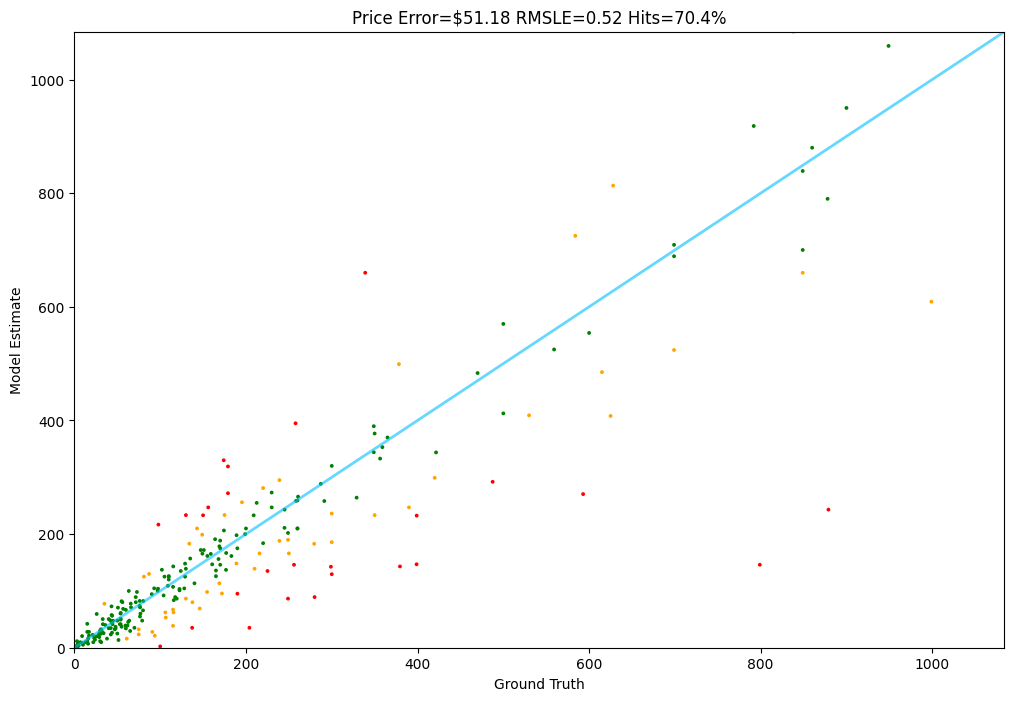

In [10]:
Tester.test(ensemble_agent.price, test[:250])